# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g.,

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [ ]:
!pip install kaggle

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pwd

/root/shared/Courses/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2


In [ ]:
!ls -l  ~/.kaggle/kaggle.json

ls: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle competitions files home-credit-default-risk

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```

![image.png](attachment:image.png)

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [ ]:
DATA_DIR = "../../../Data/home-credit-default-risk"  #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir DATA_DIR

In [ ]:
!ls -l DATA_DIR

total 0


In [ ]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!pwd

/root/shared/Courses/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/Phase2


In [ ]:
!ls -l $DATA_DIR

ls: cannot access '../../../Data/home-credit-default-risk': No such file or directory


In [ ]:
!rm -r  DATA_DIR

### Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# unzippingReq = True #True
# if unzippingReq: #please modify this code
#     zip_ref = zipfile.ZipFile(f'{DATA_DIR}/home-credit-default-risk.zip', 'r')
#     # extractall():  Extract all members from the archive to the current working directory. path specifies a different directory to extract to
#     zip_ref.extractall('{DATA_DIR}')
#     zip_ref.close()


## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

![image.png](attachment:image.png)

### Application train

In [ ]:
#ls -l ../../../Users/woojeongkin/Desktop/24Spring/P556/Final_Project/application_train.csv

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets = {}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
#DATA_DIR=f"{DATA_DIR}/home-credit-default-risk/"
datasets[ds_name] = load_data(f'{ds_name}.csv', ds_name)

datasets['application_train'].shape


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

In [ ]:
# DATA_DIR

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [ ]:
ds_name = 'application_test'
datasets[ds_name] = load_data(f'{ds_name}.csv', ds_name)


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [ ]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(f'{ds_name}.csv', ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 18.9 s, sys: 3.02 s, total: 21.9 s
Wall time: 33.4 s


In [ ]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Summary of Application train and Application test

### Summary of Application train

In [ ]:
datasets["application_train"].shape

(307511, 122)

- There are a total of 3,07,511 rows in "application training" dataset and 122 features, including the "Target" column.

In [ ]:
datasets["application_train"].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
datasets["application_train"].describe() #numerical only features

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [ ]:
# Define function to List the categorical and Numerical features in the dataframe

def datatypes_groups(df, df_name):
    print(f"Description of the {df_name} dataset:\n")
    print("-----"*15)
    print("Data type value counts: \n",df.dtypes.value_counts())

    df_dtypes = df.columns.to_series().groupby(df.dtypes).groups
    print("-----"*15)
    print(f"Categorical and Numerical(int + float) features  of {df_name}.")
    print("-----"*15)
    print()
    for k, v in df_dtypes.items():
        print({k.name: v})
        print("---"*10)
    print("\n \n")

In [ ]:
datatypes_groups(datasets['application_train'], 'application_train')

Description of the application_train dataset:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      41
object     16
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_train.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DO

- Explaination
- There are 16 Categorical features and 106 Numerical(int + float) features in the "application_train" dataset.

### Summary of Application test

In [ ]:
datasets["application_test"].shape

(48744, 121)

- There are a total of 487,44 rows in "application test" dataset and 122 features, including the "Target" column.

In [ ]:
datasets["application_test"].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [ ]:
datasets["application_test"].describe() #numerical only features

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [ ]:
datasets["application_test"].describe(include='all') #look at all categorical and numerical

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744,48744,48744,48744,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48305,32678,32311,33658,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277796.676350,NaN,NaN,NaN,NaN,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,NaN,NaN,NaN,NaN,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,NaN,NaN,NaN,NaN,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,NaN,NaN,NaN,NaN,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


In [ ]:
datatypes_groups(datasets['application_test'], 'application_test')

Description of the application_test dataset:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      40
object     16
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_test.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
 

- Explaination
- There are 16 Categorical features and 105 Numerical(int + float) features in the "application_test" dataset.

## Missing data for application train and test

### Missing data for application train

In [ ]:
# !pip install missingno

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199


In [ ]:
# msno.bar(datasets['application_train'])

In [ ]:
# msno.matrix(datasets['application_train'])

### Missing data for application test

In [ ]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
COMMONAREA_MEDI,68.72,33495
NONLIVINGAPARTMENTS_AVG,68.41,33347
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780


In [ ]:
# msno.bar(datasets['application_test'])

In [ ]:
# msno.matrix(datasets['application_test'])

## Distribution of the target column

In [ ]:
# Print the value counts of the 'TARGET' column in "application_train" dataset

print(datasets["application_train"]['TARGET'].value_counts())

0    282686
1     24825
Name: TARGET, dtype: int64


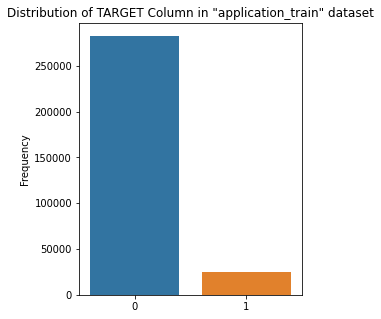

In [ ]:
# Plot the distribution of the values of 'TARGET' column in "application_train" dataset

import matplotlib.pyplot as plt
import seaborn as sns

target_distribution = datasets["application_train"]['TARGET'].value_counts()

plt.figure(figsize=(4, 5))

sns.barplot(x=target_distribution.index, y=target_distribution.values)

plt.title('Distribution of TARGET Column in "application_train" dataset')  # Set the title for your plot
plt.ylabel('Frequency')

plt.show()

- Explaination
- As shown above, an imbalanced class issue was found in the "application_train" dataset. Class Imbalance is a common problem in machine learning, especially in classification tasks. This problem can negatively impact the performance and accuracy of machine models. Therefore, we need to handle the class imbalance problem before performing machine learning using combining Undersampling and Oversampling' techniques.

- Explaination
- The correlation results with the TARGET column from the application_train dataset showed that the variables most positively correlated with the target variable was DAYS_BIRTH (0.078239), whereas, the variables most negatively correlated with the target variable was EXT_SOURCE_3 (-0.178919).

## Applicants Age

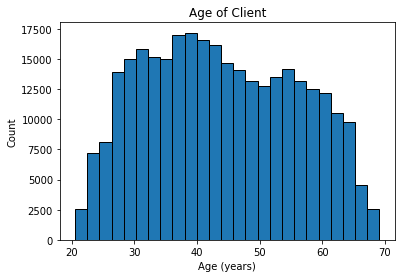

In [ ]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

## Applicants occupations

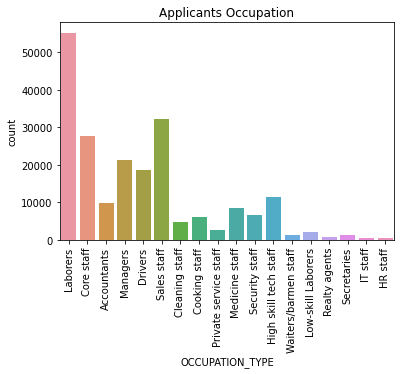

In [ ]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

# Dataset questions
## Unique record for each SK_ID_CURR

In [ ]:
list(datasets.keys())

['application_train',
 'application_test',
 'bureau',
 'bureau_balance',
 'credit_card_balance',
 'installments_payments',
 'previous_application',
 'POS_CASH_balance']

In [ ]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [ ]:
# is there an overlap between the test and train customers
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [ ]:
#
datasets["application_test"].shape

(48744, 121)

In [ ]:
datasets["application_train"].shape

(307511, 122)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [ ]:
appsDF = datasets["previous_application"]
display(appsDF.head())
print(f"{appsDF.shape[0]:,} rows, {appsDF.shape[1]:,} columns")

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


1,670,214 rows, 37 columns


In [ ]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [ ]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 291,057


In [ ]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 47,800


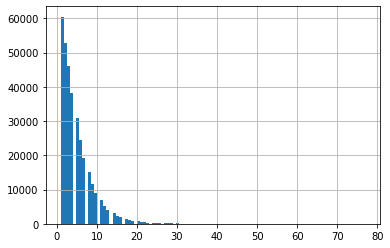

In [ ]:
# How many previous applciations  per applicant in the previous_application
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications
plt.hist(prevAppCounts[prevAppCounts>=0], bins=100)
plt.grid()

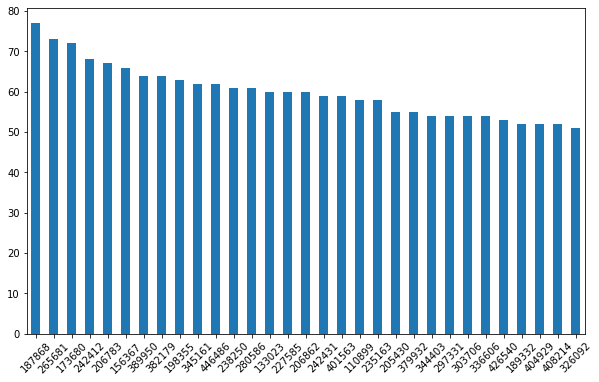

In [ ]:
# Display the applicants with more than 50 applications in the dataset.

plt.figure(figsize=(10, 6))
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

### Histogram of Number of previous applications for an ID

In [ ]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

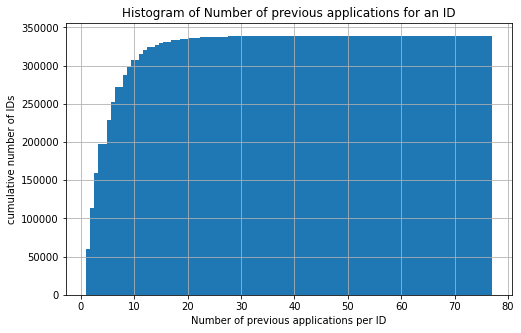

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')
plt.show()

##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [ ]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.

To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).

I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments',
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## agg detour

Aggregate using one or more operations over the specified axis.

For more details see [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
```python
DataFrame.agg(func, axis=0, *args, **kwargs**)
```
Aggregate using one or more operations over the specified axis.


In [ ]:
df = pd.DataFrame([[1, 2, 3],
                    [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                   columns=['A', 'B', 'C'])
display(df)

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [ ]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})
#        A    B
#max   NaN  8.0
#min   1.0  2.0
#sum  12.0  NaN

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [ ]:
df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                    'C': np.random.randn(4)})
display(df)

,A,B,C
0,1,1,0.981926
1,1,2,-0.647712
2,2,3,0.142058
3,2,4,-1.266687


In [ ]:
# group by column A:
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
#    B             C
#  min max       sum
#A
#1   1   2  0.590716
#2   3   4  0.704907

B             C
  min max       sum
A                  
1   1   2  0.334214
2   3   4 -1.124629

In [ ]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
funcs = ["a","b","c"]
{f:f"{f}_max" for f in funcs}

{'a': 'a_max', 'b': 'b_max', 'c': 'c_max'}

### Multiple condition expressions in Pandas
So far, both our boolean selections have involved a single condition. You can, of course, have as many conditions as you would like. To do so, you will need to combine your boolean expressions using the three logical operators and, or and not.

Use &, | , ~
Although Python uses the syntax and, or, and not, these will not work when testing multiple conditions with pandas. The details of why are explained [here](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c).

You must use the following operators with pandas:

* & for and
* | for or
* ~ for not

In [ ]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]["AMT_CREDIT"]

6    0.0
Name: AMT_CREDIT, dtype: float64

In [ ]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


## Missing values in prevApps

In [ ]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## feature engineering for prevApp table

The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation.

```python
import pandas as pd
import dateutil

# Load data from csv file
data = pd.DataFrame.from_csv('phone_data.csv')
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

data.groupby('month', as_index=False).agg({"duration": "sum"})
```
Pandas `reset_index()` to convert Multi-Index to Columns
We can simplify the multi-index dataframe using reset_index() function in Pandas. By default, Pandas reset_index() converts the indices to columns.

#### Fixing Column names after Pandas agg() function to summarize grouped data
Since we have both the variable name and the operation performed in two rows in the Multi-Index dataframe, we can use that and name our new columns correctly.

For more details unstacking groupby results and examples please see [here](https://cmdlinetips.com/2020/05/fun-with-pandas-groupby-aggregate-multi-index-and-unstack/)




For more details and examples please see [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

## feature transformer for prevApp table

In [ ]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
#             self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            self.agg_op_features[f] =  ["min", "max", "mean"]

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
#         result.columns = result.columns.droplevel()
        result.columns = ["_".join(x) for x in result.columns.ravel()]

        result = result.reset_index(level=["SK_ID_CURR"])
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"


from sklearn.pipeline import make_pipeline
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))

features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION
0     1730.430          17145.0
1    25188.615         607500.0
2    15060.735         112500.0
3    47041.335         450000.0
4    31924.395         337500.0
HELLO
Test driver: 
   SK_ID_CURR  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0      100001         3951.000         3951.000       3951.000000   
1      100002         9251.775         9251.775       9251.775000   
2      100003         6737.310        98356.995      56553.990000   
3      100004         5357.250         5357.250       5357.250000   
4      100005         4813.200         4813.200       4813.200000   
5      100006         2482.920        39954.510      23651.175000   
6      100007         1834.290        22678.785      12278.805000   
7      100008         8019.090        25309.575      15839.696250   
8      100009         7435.845        17341.605      10051.412143   
9      100010        27463.

## Feature Engineering for Primary & Secondary Tables

In [ ]:
# Choosing Highly correlated features from all input datasets

def correlation_files_target(df_name):
  A = datasets["application_train"].copy()
  B = datasets[df_name].copy()
  correlation_matrix =  pd.concat([A.TARGET, B], axis=1).corr().filter(B.columns).filter(A.columns, axis=0)
  return correlation_matrix

In [ ]:
agg_funcs = ['min', 'max', 'mean', 'count', 'sum']

prevApps = datasets['previous_application']
prevApps_features = ['AMT_ANNUITY', 'AMT_APPLICATION']

bureau = datasets['bureau']
bureau_features = ['AMT_ANNUITY', 'AMT_CREDIT_SUM']
# bureau_funcs = ['min', 'max', 'mean', 'count', 'sum']

bureau_bal = datasets['bureau_balance']
bureau_bal_features = ['MONTHS_BALANCE']

cc_bal = datasets['credit_card_balance']
cc_bal_features = ['MONTHS_BALANCE', 'AMT_BALANCE', 'CNT_INSTALMENT_MATURE_CUM']

installments_pmnts = datasets['installments_payments']
installments_pmnts_features = ['AMT_INSTALMENT', 'AMT_PAYMENT']

pos_cash_bal = datasets['POS_CASH_balance']
pos_cash_bal_features = ['CNT_INSTALMENT', 'MONTHS_BALANCE' ]

## Feature Aggregator

- Added a if statement allowing us to transform bureau_balance as it does not have a SK_ID_CURR as it joins with bureau.csv on the SK_ID_BUREAU column. Will have to keep this in mind when joining the tables.

In [ ]:
# Pipelines
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder


class FeaturesAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, file_name=None, features=None, funcs=None):
        self.file_name = file_name
        self.features = features
        self.funcs = funcs
        self.agg_op_features = {}
        for f in self.features:
            temp = {f"{file_name}_{f}_{func}":func for func in self.funcs}
            self.agg_op_features[f]=[(k, v) for k, v in temp.items()]
        print(self.agg_op_features)
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.file_name != 'bureau_balance' and self.file_name != 'bureau':
            result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
            result.columns = result.columns.droplevel()
            result = result.reset_index(level=["SK_ID_CURR"])
            return result  # return dataframe with the join key "SK_ID_CURR"

        elif self.file_name == 'bureau':
            result = X.groupby(["SK_ID_CURR", "SK_ID_BUREAU"]).agg(self.agg_op_features)
            result.columns = result.columns.droplevel()
            result = result.reset_index(level=["SK_ID_CURR", "SK_ID_BUREAU"])
            return result  # return dataframe with the join keys "SK_ID_CURR" AND "SK_ID_BUREAU"

        elif self.file_name == 'bureau_balance':
            result = X.groupby(["SK_ID_BUREAU"]).agg(self.agg_op_features)
            result.columns = result.columns.droplevel()
            result = result.reset_index(level=["SK_ID_BUREAU"])
            return result  # return dataframe with the join key "SK_ID_BUREAU"




In [ ]:
class engineer_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

# FROM APPLICATION
        # ADD INCOME CREDIT PERCENTAGE
        X['ef_INCOME_CREDIT_PERCENT'] = (
            X.AMT_INCOME_TOTAL / X.AMT_CREDIT).replace(np.inf, 0)

        # ADD INCOME PER FAMILY MEMBER
        X['ef_FAM_MEMBER_INCOME'] = (
            X.AMT_INCOME_TOTAL / X.CNT_FAM_MEMBERS).replace(np.inf, 0)

        # ADD ANNUITY AS PERCENTAGE OF ANNUAL INCOME
        X['ef_ANN_INCOME_PERCENT'] = (
            X.AMT_ANNUITY / X.AMT_INCOME_TOTAL).replace(np.inf, 0)

- Added the pos_cash_pal feature pipeline instead of the application_train feature engineering pipeline because we don't need it as our goal is to do feature aggregation on each of the secondary tables then join them to application train and test

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion

prevApps_feature_pipeline = Pipeline([
    ('prevApps_aggregator', FeaturesAggregator('prevApps', prevApps_features, agg_funcs)),
    ])

bureau_feature_pipeline = Pipeline([
    ('bureau_aggregator', FeaturesAggregator('bureau', bureau_features, agg_funcs)),
    ])

bureau_bal_features_pipeline = Pipeline([
    ('bureau_bal_aggregator', FeaturesAggregator('bureau_balance', bureau_bal_features , agg_funcs)),
    ])

cc_bal_features_pipeline = Pipeline([
    ('cc_bal_aggregator', FeaturesAggregator('credit_card_balance', cc_bal_features , agg_funcs)),
    ])

installments_pmnts_features_pipeline = Pipeline([
    ('installments_pmnts_features_aggregator', FeaturesAggregator('credit_card_balance', installments_pmnts_features , agg_funcs)),
    ])

pos_cash_bal_feature_pipeline = Pipeline([
    ('pos_cash_bal_aggregator',FeaturesAggregator('pos_cash_bal', pos_cash_bal_features , agg_funcs)),  # add some new features
    ])

{'AMT_ANNUITY': [('prevApps_AMT_ANNUITY_min', 'min'), ('prevApps_AMT_ANNUITY_max', 'max'), ('prevApps_AMT_ANNUITY_mean', 'mean'), ('prevApps_AMT_ANNUITY_count', 'count'), ('prevApps_AMT_ANNUITY_sum', 'sum')], 'AMT_APPLICATION': [('prevApps_AMT_APPLICATION_min', 'min'), ('prevApps_AMT_APPLICATION_max', 'max'), ('prevApps_AMT_APPLICATION_mean', 'mean'), ('prevApps_AMT_APPLICATION_count', 'count'), ('prevApps_AMT_APPLICATION_sum', 'sum')]}
{'AMT_ANNUITY': [('bureau_AMT_ANNUITY_min', 'min'), ('bureau_AMT_ANNUITY_max', 'max'), ('bureau_AMT_ANNUITY_mean', 'mean'), ('bureau_AMT_ANNUITY_count', 'count'), ('bureau_AMT_ANNUITY_sum', 'sum')], 'AMT_CREDIT_SUM': [('bureau_AMT_CREDIT_SUM_min', 'min'), ('bureau_AMT_CREDIT_SUM_max', 'max'), ('bureau_AMT_CREDIT_SUM_mean', 'mean'), ('bureau_AMT_CREDIT_SUM_count', 'count'), ('bureau_AMT_CREDIT_SUM_sum', 'sum')]}
{'MONTHS_BALANCE': [('bureau_balance_MONTHS_BALANCE_min', 'min'), ('bureau_balance_MONTHS_BALANCE_max', 'max'), ('bureau_balance_MONTHS_BALANCE_

## Prepare Datasets

- Added poscashbalDF

In [ ]:
poscashbalDF = datasets['POS_CASH_balance']

X_train = datasets['application_train']
prevAppsDF = datasets["previous_application"] #prev app
bureauDF = datasets["bureau"] #bureau app
bureaubalDF = datasets['bureau_balance']
ccbalDF = datasets["credit_card_balance"] #prev app
installmentspaymentsDF = datasets["installments_payments"] #bureau app

## Fit Feature Engineering Pipeline

- Removed the applin pipeline and added the pos_cash_bal_aggregated

In [ ]:
pos_cash_bal_aggregated = pos_cash_bal_feature_pipeline.fit_transform(poscashbalDF)
prevApps_aggregated = prevApps_feature_pipeline.fit_transform(prevAppsDF)
bureau_aggregated = bureau_feature_pipeline.fit_transform(bureauDF)

In [ ]:
bureaubal_aggregated = bureau_bal_features_pipeline.fit_transform(bureaubalDF)
ccblance_aggregated = cc_bal_features_pipeline.fit_transform(ccbalDF)
installments_pmnts_aggregated = installments_pmnts_features_pipeline.fit_transform(installmentspaymentsDF)

In [ ]:
installments_pmnts_aggregated.head()

,SK_ID_CURR,credit_card_balance_AMT_INSTALMENT_min,credit_card_balance_AMT_INSTALMENT_max,credit_card_balance_AMT_INSTALMENT_mean,credit_card_balance_AMT_INSTALMENT_count,credit_card_balance_AMT_INSTALMENT_sum,credit_card_balance_AMT_PAYMENT_min,credit_card_balance_AMT_PAYMENT_max,credit_card_balance_AMT_PAYMENT_mean,credit_card_balance_AMT_PAYMENT_count,credit_card_balance_AMT_PAYMENT_sum
0,100001,3951.000,17397.900,5885.132143,7,41195.925,3951.000,17397.900,5885.132143,7,41195.925
1,100002,9251.775,53093.745,11559.247105,19,219625.695,9251.775,53093.745,11559.247105,19,219625.695
2,100003,6662.970,560835.360,64754.586000,25,1618864.650,6662.970,560835.360,64754.586000,25,1618864.650
3,100004,5357.250,10573.965,7096.155000,3,21288.465,5357.250,10573.965,7096.155000,3,21288.465
4,100005,4813.200,17656.245,6240.205000,9,56161.845,4813.200,17656.245,6240.205000,9,56161.845


In [ ]:
bureau_aggregated.head()

,SK_ID_CURR,SK_ID_BUREAU,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_sum,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_sum
0,100001,5896630,0.0,0.0,0.0,1,0.0,112500.0,112500.0,112500.0,1,112500.0
1,100001,5896631,0.0,0.0,0.0,1,0.0,279720.0,279720.0,279720.0,1,279720.0
2,100001,5896632,0.0,0.0,0.0,1,0.0,91620.0,91620.0,91620.0,1,91620.0
3,100001,5896633,0.0,0.0,0.0,1,0.0,85500.0,85500.0,85500.0,1,85500.0
4,100001,5896634,4630.5,4630.5,4630.5,1,4630.5,337680.0,337680.0,337680.0,1,337680.0


In [ ]:
bureaubal_aggregated.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_sum
0,5001709,-96,0,-48.0,97,-4656
1,5001710,-82,0,-41.0,83,-3403
2,5001711,-3,0,-1.5,4,-6
3,5001712,-18,0,-9.0,19,-171
4,5001713,-21,0,-10.5,22,-231


## Join the labeled dataset

In [ ]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [ ]:
merge_all_data = True

if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)

# merge primary table and secondary tables using features based on meta data and  aggregage stats
if merge_all_data:
    ### Merging bureau and bureau balancce
    bureau_aggregated = bureau_aggregated.merge(bureaubal_aggregated, how = 'left', on = "SK_ID_BUREAU")
    ### Train DF
    X_train = X_train.merge(prevApps_aggregated, how = 'left', on = 'SK_ID_CURR')
    X_train = X_train.merge(bureau_aggregated, how = 'left', on = "SK_ID_CURR")
    X_train = X_train.merge(ccblance_aggregated, how = 'left', on = "SK_ID_CURR")
    X_train = X_train.merge(installments_pmnts_aggregated, how = 'left', on = "SK_ID_CURR")
    X_train = X_train.merge(pos_cash_bal_aggregated, how = 'left', on = "SK_ID_CURR")

## Join the unlabeled dataset (i.e., the submission file)

In [ ]:
X_kaggle_test= datasets["application_test"]
merge_all_data = True
if merge_all_data:
    X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how ='left', on = 'SK_ID_CURR')

    X_kaggle_test = X_kaggle_test.merge(bureau_aggregated, how ='left', on = "SK_ID_CURR")

    X_kaggle_test = X_kaggle_test.merge(ccblance_aggregated, how ='left', on = "SK_ID_CURR")

    X_kaggle_test = X_kaggle_test.merge(installments_pmnts_aggregated, how ='left', on="SK_ID_CURR")

    X_kaggle_test = X_kaggle_test.merge(pos_cash_bal_aggregated, how = 'left', on = "SK_ID_CURR")

In [ ]:
# approval rate 'NFLAG_INSURED_ON_APPROVAL'

In [ ]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X

# Processing pipeline

###  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):



Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.



Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE',
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


In [ ]:
# # load data
# df = pd.read_csv('chronic_kidney_disease.csv', header="infer")
# # names=['age', ‘bp’, ‘sg’, ‘al’, ‘su’, ‘rbc’, ‘pc’, ‘pcc’, ‘ba’, ‘bgr’, ‘bu’, ‘sc’, ‘sod’, ‘pot’,
# # ‘hemo’, ‘pcv’, ‘wc’, ‘rc’, ‘htn’, ‘dm’, ‘cad’, ‘appet’, ‘pe’, ‘ane’, ‘class’])
# # head of df
# df.head(10)

In [ ]:
# # Categorical boolean mask
# categorical_feature_mask = df.dtypes==object
# categorical_feature_mask

In [ ]:
# # filter categorical columns using mask and turn it into a list
# categorical_cols = X.columns[categorical_feature_mask].tolist()
# categorical_cols

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd
# categorical_feature_mask = [True, False]
# # instantiate OneHotEncoder
# enc = OneHotEncoder(categorical_features = categorical_feature_mask,sparse = False, handle_unknown='ignore')
# # categorical_features = boolean mask for categorical columns
# # sparse = False output an array not sparse matrix
# X_train = pd.DataFrame([['small', 1], ['small', 3], ['medium', 3], ['large', 2]])
# X_test = [['small', 1.2],  ['medium', 4], ['EXTRA-large', 2]]
# print(f"X_train:\n{X_train}")
# print(f"enc.fit_transform(X_train):\n{enc.fit_transform(X_train)}")
# print(f"enc.transform(X_test):\n{enc.transform(X_test)}")

# print(f"enc.get_feature_names():\n{enc.get_feature_names()}")


In [ ]:
# print(f"enc.categories_{enc.categories_}")

# print(f"enc.categories_{enc.categories_}")
# enc.transform([['Female', 1], ['Male', 4]]).toarray()


# enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])


# enc.get_feature_names()


### OHE case study: The breast cancer wisconsin dataset (classification)

In [ ]:
# from sklearn.datasets import load_breast_cancer
# data = load_breast_cancer(return_X_y=False)
# X, y = load_breast_cancer(return_X_y=True)
# print(y[[10, 50, 85]])
# #([0, 1, 0])
# list(data.target_names)
# #['malignant', 'benign']
# X.shape

In [ ]:
# data.feature_names

Please [this  blog](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d) for more details of OHE when the validation/test have previously unseen unique values.

## HCDR preprocessing

In [ ]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = False #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE',
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test= datasets["application_test"][selected_features]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)



selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE',
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
y_train = X_train['TARGET']
X_train = X_train[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)


print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (1090501, 14)
X validation      shape: (226402, 14)
X test            shape: (192442, 14)
X X_kaggle_test   shape: (257527, 14)


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g.,
#      extract the domain address of the homepage and OneHotEncode it
#
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol


from sklearn.pipeline import make_pipeline
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))

x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


X_train.shape: (1090501, 14)

X_train['name'][0:5]: 
        OCCUPATION_TYPE
899239         Laborers
1333889     Sales staff
597650   Medicine staff
209947       Core staff
451114              NaN
X_train.shape: (1090501, 14)

X_train['name'][0:5]: 
        OCCUPATION_TYPE
899239         Laborers
1333889     Sales staff
597650   Medicine staff
209947       Core staff
451114              NaN
Test driver: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
X_train['name'][0:10]: 
               OCCUPATION_TYPE
899239                Laborers
1333889            Sales staff
597650          Medicine staff
209947              Core staff
451114                     NaN
1372880  High skill tech staff
486230                     NaN
1127205            Sales staff
1134196         Cleaning staff
1108233                    NaN


In [ ]:
# Create a class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
# Identify the numeric features we wish to consider.
num_attribs = [
    'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
    'EXT_SOURCE_2','EXT_SOURCE_3']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE',
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(handle_unknown="ignore"))
    ])
#Removed sparse from (sparse=False, 'ohe', OneHotEncoder(handle_unknown="ignore"))
data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [ ]:
list(datasets["application_train"].columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [ ]:
def pct(x):
    return round(100*x,3)

In [ ]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name",
                                   "Train Acc",
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC",
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train F1 Score",
                                   "Test F1 Score"
                                  ])


%%time
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])
model = full_pipeline_with_predictor.fit(X_train, y_train)


## Evaluation metrics

- In the present final project, several evaluation meterics for Classification task were used to evaluate model peroformacnce, including Accuracy, Confusion Matrix, Precision, Recall, F1 Score, AUC-ROC curve.

### Accuracy
Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.

![1_R6jP_uvlkcxtQSa264N3Sw.png](attachment:1_R6jP_uvlkcxtQSa264N3Sw.png)

### Precision
Precision for a label is defined as the number of true positives divided by the number of predicted positives.

![0_p1t9CzwpaOXxsx4l.png](attachment:0_p1t9CzwpaOXxsx4l.png)

### Recall
Recall for a label is defined as the number of true positives divided by the total number of actual positives.

![0_XgGoMQLlGGDgpzYa.png](attachment:0_XgGoMQLlGGDgpzYa.png)

### F1 Score
F1 Score is the harmonic mean of precision and recall.

![0_tu5x_GEgs-iRpJ9H.png](attachment:0_tu5x_GEgs-iRpJ9H.png)

### Confusion Matrix
Confusion Matrix is a performance measurement for the machine learning classification problems where the output can be two or more classes. It is a table with combinations of predicted and actual values.

- True Positive: We predicted positive and it’s true.
- True Negative: We predicted negative and it’s true.
- False Positive (Type 1 Error): We predicted positive and it’s false.
- False Negative (Type 2 Error): We predicted negative and it’s false.

![1__JY_jxfndH8oBI3clamifA.png](attachment:1__JY_jxfndH8oBI3clamifA.png)

### AUC-ROC
The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values and separates the ‘signal’ from the ‘noise’.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

model = full_pipeline_with_predictor.fit(X_train, y_train)

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

0.921

### Calculate accuracy, and Classification report of baseline model on testing data

In [ ]:
# Calculate accuracy, and Classification report of baseline model on testing data

accuracy_test_baseline = accuracy_score(y_test, model.predict(X_test)) * 100
report_test_baseline = classification_report(y_test, model.predict(X_test))

print("Accuracy of Logistic Regression: {:.2f}%".format(accuracy_test_baseline))
print(".........................................................................")
print("Classification report: Logistic Regression")
print()
print(report_test_baseline)

Accuracy of Logistic Regression: 92.18%
.........................................................................
Classification report: Logistic Regression

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    177375
           1       0.52      0.01      0.02     15067

    accuracy                           0.92    192442
   macro avg       0.72      0.50      0.49    192442
weighted avg       0.89      0.92      0.89    192442



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])


0.7411204703455814

In [ ]:
from sklearn.metrics import f1_score
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)),
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)),
                f1_score(y_test, model.predict(X_test))],
    4))
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Test F1 Score
0,Baseline_14_features,0.9211,0.9214,0.9218,0.7411,0.7406,0.7413,0.0174,0.0168


### Confusion matrix for baseline model

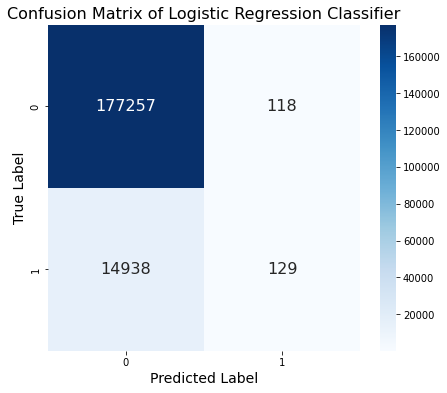

In [ ]:
# Create confusion matrix for baseline model

from sklearn.metrics import RocCurveDisplay, confusion_matrix

cm_lr = confusion_matrix(y_test, model.predict(X_test))

plt.figure(figsize = (7, 6))
sns.heatmap(cm_lr, annot = True, fmt = "d", cmap = "Blues", annot_kws={"fontsize": 16})  # Adjust fontsize here
plt.title("Confusion Matrix of Logistic Regression Classifier", fontsize = 16)
plt.xlabel("Predicted Label", fontsize = 14)
plt.ylabel("True Label", fontsize = 14)
plt.show()

### ROC curve for baseline model

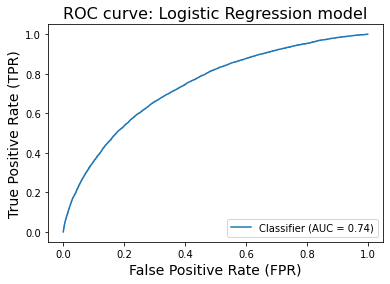

In [ ]:
#Plot the ROC curve for baseline model

y_score = model.predict_proba(X_test)[:, 1]

roc_display = RocCurveDisplay.from_predictions(y_test, y_score)
plt.title("ROC curve: Logistic Regression model", fontsize = 16)  # Adjust the title to reflect your model
plt.xlabel("False Positive Rate (FPR)", fontsize = 14)
plt.ylabel("True Positive Rate (TPR)", fontsize = 14)
plt.show()

## Hyperparameter Tuning of Basline model with grid search CV

In [ ]:
params_grid = {'linear__penalty': ['l1', 'l2'],
            'linear__tol': [0.0001, 0.00001, 0.0000001],
            'linear__C': [10, 1, 0.1, 0.01]}

# Initialize GridSearchCV with the pipeline and the parameter grid
gs = GridSearchCV(full_pipeline_with_predictor, params_grid, cv=5, n_jobs=-1, verbose=2, refit=True)

### Creating a subset as the full file is just too big and crashes my kernal
random_index = X_train.sample(n=100000, random_state=42).index
X_train_subset = X_train.loc[random_index]
y_train_subset = y_train.loc[random_index]
print(X_train_subset.shape)
print(y_train_subset.shape)

gs.fit(X_train_subset, y_train_subset)

(100000, 14)
(100000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        FeatureUnion(transformer_list=[('num_pipeline',
                                                                        Pipeline(steps=[('selector',
                                                                                         DataFrameSelector(attribute_names=['AMT_INCOME_TOTAL',
                                                                                                                            'AMT_CREDIT',
                                                                                                                            'DAYS_EMPLOYED',
                                                                                                                            'DAYS_BIRTH',
                                                                                                                            'EXT_SOURCE_1',
                                    

In [ ]:
best_model = gs.best_estimator_
best_params = gs.best_params_


# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred) * 100

print("Best model hyperparameters:", best_params)
print("Accuracy of best model:", best_accuracy)

Best model hyperparameters: {'linear__C': 1, 'linear__penalty': 'l2', 'linear__tol': 0.0001}
Accuracy of best model: 92.17790295257792


### Calculate accuracy, and Classification report of baseline model on testing data

In [ ]:
# Calculate accuracy, and Classification report of baseline model on testing data

accuracy_test_gs = accuracy_score(y_test, best_model.predict(X_test))* 100
report_test_gs = classification_report(y_test, best_model.predict(X_test))

print("Accuracy of Logistic Regression with hyperparameter tuning: {:.2f}%".format(accuracy_test_gs))
print(".........................................................................")
print("Classification report: Logistic Regression with hyperparameter tuning")
print()
print(report_test_gs)

Accuracy of Logistic Regression with hyperparameter tuning: 92.18%
.........................................................................
Classification report: Logistic Regression with hyperparameter tuning

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    177375
           1       0.53      0.01      0.02     15067

    accuracy                           0.92    192442
   macro avg       0.73      0.50      0.49    192442
weighted avg       0.89      0.92      0.89    192442



In [ ]:
exp_name = "GridSearchCV Logistic Regression"

expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, best_model.predict(X_train)),
                accuracy_score(y_valid, best_model.predict(X_valid)),
                accuracy_score(y_test, best_model.predict(X_test)),
                roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, best_model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, best_model.predict(X_train)),
                f1_score(y_test, best_model.predict(X_test))],
    4))
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Test F1 Score
0,Baseline_14_features,0.9211,0.9214,0.9218,0.7411,0.7406,0.7413,0.0174,0.0168
1,GridSearchCV Logistic Regression,0.9211,0.9214,0.9218,0.7399,0.7397,0.7403,0.0163,0.0163


### Create confusion matrix for Logistic Regression with hyperparameter tuning

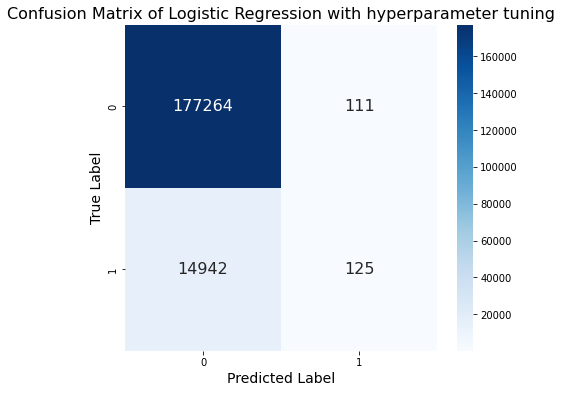

In [ ]:
# Create confusion matrix for Logistic Regression with hyperparameter tuning

cm_lr_gs = confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize = (7, 6))
sns.heatmap(cm_lr_gs, annot = True, fmt = "d", cmap = "Blues", annot_kws={"fontsize": 16})  # Adjust fontsize here
plt.title("Confusion Matrix of Logistic Regression with hyperparameter tuning", fontsize = 16)
plt.xlabel("Predicted Label", fontsize = 14)
plt.ylabel("True Label", fontsize = 14)
plt.show()

### Plot the ROC curve for Logistic Regression with hyperparameter tuning

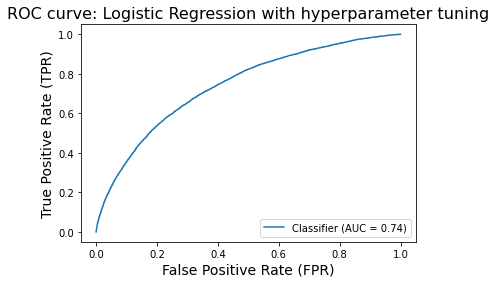

In [ ]:
#Plot the ROC curve for Logistic Regression with hyperparameter tuning

y_score = best_model.predict_proba(X_test)[:, 1]

roc_display = RocCurveDisplay.from_predictions(y_test, y_score)
plt.title("ROC curve: Logistic Regression with hyperparameter tuning", fontsize = 16)  # Adjust the title to reflect your model
plt.xlabel("False Positive Rate (FPR)", fontsize = 14)
plt.ylabel("True Positive Rate (TPR)", fontsize = 14)
plt.show()

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [ ]:
test_class_scores = model.predict_proba(X_kaggle_test.drop_duplicates())[:, 1]

In [ ]:
test_class_scores[0:10]

array([0.05803146, 0.18384931, 0.02918184, 0.0633911 , 0.11813195,
       0.05099085, 0.01717747, 0.07965406, 0.01475007, 0.18479504])

In [ ]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.058031
1,100005,0.183849
2,100013,0.029182
3,100028,0.063391
4,100038,0.118132


In [ ]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [ ]:
# ! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

![image.png](attachment:image.png)

# Write-up
In this section, we will summarize the work done for phase 2.

## Project title:
Predicting credit default risk using machine learning

## Team and phase leader plan:
This week, our phase leader is Wunchana Seubwai. Our phase schedule is below

| Phase |  Phase leader |
|----------|----------|
| Phase 1    | Evie Mahsem    |
| Phase 2    | Wunchana Seubwai    |
| Phase 3    | Woojeong Kim    |
| Phase 4    | Alaina Barca    |

## Credit assignment plan for phase 2:
| Group member |  Tasks completed |
|----------|----------|
| Evie Mahsem    | Did EDA, built baseline pipelines, visualized EDA, contributed to slides |
| Wunchana Seubwai | Did EDA, built baseline pipelines, visualized EDA, created PPT template and contributed to slides   |
| Woojeong Kim   |  Led development of PPT slides |
| Alaina Barca   |  Wrote report and developed presentation video |

## Abstract
The aim of this final project on the Home Credit Default Risk dataset is to develop a predictive model that accurately predicts whether a client will default on a loan. For phase 2 of the final project, we implemented several EDA and feature engineering techniques before constructing logistic regression models with and without hyperparameter tuning to identify potential loan defaulters among Home Credit's clientele. Various evaluation metrics, including accuracy score, precision, recall, F-1 score, confusion matrix, and ROC-AUC curve, were used to evaluate model performance. The results demonstrated that both models exhibited similar accuracy across the training, validation, and test datasets, with accuracy scores of around 92% and AUC scores of approximately 0.74. However, we aim to improve our model's performance by addressing class imbalance issues in the dataset. In addition, more machine learning models for classification tasks will be explored in the final project's phase 3.

## Introduction
A consumer’s ability to access a line of credit is often highly dependent on their credit history, leaving many potentially credit-worthy consumers without traditional loan options simply due to insufficient data. In this project, we will explore data from Home Credit, a lender striving to lend to consumers with insufficient credit histories using alternative lending data, to improve their methods for predicting loan repayment. We will use consumer transaction and payment data to develop pipelines for various machine learning algorithms – including logistic regressions, classification methods, and deep learning models – to predict consumers’ likelihood of default. We will evaluate each method’s predictive power using the ROC curve and produce a report summarizing the methods tested and the strongest performing predictor of consumer default. We will follow the project schedule for intermediate steps, which includes developing EDA and baseline pipeline in week 14, feature engineering and hyperparameter tuning in week 15, and implementing neural networks, advanced models, and finalizing the project in week 16.

For this phase (week 14), we review the dataset, conduct EDA, basic feature engineering and transformers, develop pipelines for our baseline model, and discuss our initial experimental results. We conclude with next steps for phase 3.

## Dataset
The dataset from Home Credit is comprised of seven different sources of data. The first, __application_train/application_test (307k rows, and 48k rows)__ is our main training and testing data. Six other datasets supplement the main train and test data. The dataset __bureau (1.7 Million rows)__ contains client credit history, __bureau_balance (27 Million rows)__ includes monthly credit history, __previous_application (1.6 Million rows)__ contains previous applications, __POS_CASH_BALANCE (10 Million rows)__ provides monthly data on spending, __credit_card_balance__ gives us monthly credit card information, and __installments_payment (13.6 Million rows)__ contains previous loan payments with Home Credit, if any.

## EDA
From our EDA, we find that there are 16 categorical features and 106 numeric features in the application_train dataset. There are 48,744 rows and 122 features, including the "target" column (which represents whether a loan was repaid, with 0 for no and 1 for yes). There is quite a bit of missing data, with as much as 68.72 percent of some variables' observations missing. There is also quite a bit of class imbalance for our target variable -- 92 percent of the loans in our data are paid (0) and 8 percent are unpaid (1). So, we will need to address this in our analysis. The variable most positive correlated with the target variable is DAYS_BIRTH (0.078), while the variable most negatively correlated with the target variable is EXT_SOURCE_3 (-0.179).

The distribution of applicant age is fairly flat between the ages of 20 and 70, though there are a few spikes around the ages of 30, 40, and 55. More than any other occupation, applicants are laborers, followed by occupations of sales staff and core staff. There are 1.7 million previous credit applications in our data. 291,057 of our 307,511 unique training set applicants have submitted a previous application. This is similar to the rate we see in the test data, with 47,800 out of 48,744 test set applicants submitting a previous application. About 22 percent of applicants have submitted a small number of applications ever (less than 5). 58 percent have submitted a moderate amount of applications (10 to 39), and 20 percent have submitted a large amount of applications (40 or more).

## Feature Engineering and transformers

We conduct feature engineering for the prevApp table to address missing values, as well as creating feature transformer via pipeline for the prevApp table. We also construct a feature aggregator for the primary and secondary tables via pipeline. After fitting the feature engineering pipeline, we joined the primary and secondary datasets using features based on metadata and aggregated statistics. We then convert categorical features to numerical approximations via pipeline. We also prepare the data for our baseline model via pipeline, in which we split the provided training data into training and test sets, and identify the numeric features we wish to consider in our analysis.

## Pipelines
As described above, we constructed pipelines for the feature engineering and transformer steps in this phase of the project. We also describe the baseline model pipeline below.

![Screenshot%20%281315%29.png](attachment:Screenshot%20%281315%29.png)

## Experimental results

In Phase 2 of the final project, We developed our baseline logistic model pipeline, which we evaluate via accuracy, confusion matrix, precision, recall, F1 score, and AUC-ROC curve. We conducted hyperparameter tuning of the baseline model with grid search CV, and also evaluated model performance across the same tests.

As shown in Figure 1, Figure 2, and Table 1, Our baseline logistic model had train dataset accuracy of 0.921, a .741 AUC and a 0.017 F1 score. The test dataset had an accuracy of 0.922, a 0.741 AUC, and a 0.017 F1 score. The confusion matrix reveals we had 92.1% true negatives, 7.8% false negatives, 0.1% true positives, and 0.1% false positives. The small proportion of any positives is indicative of our imbalanced target class, and may mean we need to do more to address our imbalance issue.

We then conduct hyperparameter tuning via grid search CV. We experienced memory issues at this stage and were forced to run on a random subset of the data. According to our grid search results, the best model is a ridge regression with a tolerance of 0.0001 and a relatively strict regularization strength of 1. With this model, we see a training dataset accuracy of 0.921, a .740 AUC and a 0.016 F1 score. The test dataset had an accuracy of 0.922, a 0.740 AUC, and a 0.016 F1 score. Although the numbers shifted slightly in our confusion matrix, the percentages were the same as those presented for the baseline model above.

![Figure%201_FP%20Phase%202_Group%202.png](attachment:Figure%201_FP%20Phase%202_Group%202.png)

![Figure%202_FP%20Phase%202_Group%202-2.png](attachment:Figure%202_FP%20Phase%202_Group%202-2.png)

![Table%201_FP%20Phase%202_Group%202.png](attachment:Table%201_FP%20Phase%202_Group%202.png)

## Discussion

All models (Logistic Regression with and without hyperparameter tuning) performed well with comparable results in terms of accuracy, ROC curve, evaluation metrics, and confusion matrix for 'Class 0'. However, the machine learning models failed to accurately predict of 'Class 1'.

Based on Class '1' results, the logistic regression models with and without hyperparameter tuning performed similarly with very low precision, recall, and F1-scores. This data indicated that models failed to predict 'Class 1' accurately. A significant class imbalance could significantly impact the learning process of the machine learning models. The machine learning models may have been trained with a bias toward the majority class ('Class 0'). Consequently, the models may overfit with the majority class ('Class 0') and have difficulty accurately predicting the rare instances of 'Class 1'.

Class Imbalance is a common problem in machine learning, especially in classification tasks. This problem can negatively impact the performance and accuracy of machine models. Therefore, We would like to improve our model performance through the implementation the technique to handle class imbalance issues in the dataset, such as the Synthetic Minority Over-sampling Technique (SMOTE). In addition, more machine learning model for classification task such as random forest, SVM, ANN will be used in the final project phase 3.

## Conclusion

In this study, we performed EDA, feature engineering, and baseline model using logistic regression models, with and without hyperparameter tuning, to identify potential loan defaulters within the Home Credit Default Risk dataset. Both logistic regression models achieved high accuracy levels of approximately 92% and ROC-AUC scores around 0.74. However, the models failed to predict 'Class 1'(loan defaulters) accurately, as indicated by the low precision, recall, and F1-scores for this class. These results suggest a significant class imbalance within the dataset, which negatively impacted the model's predictive performance for the minority class. Next, we would like to handle class imbalance issue and used another machine learning model that work well with classimblance dataset to enhance model performance.

## Kaggle Submission

![download%20%2812%29.png](attachment:download%20%2812%29.png)

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)

- https://www.kaggle.com/competitions/home-credit-default-risk/overview
- https://medium.com/analytics-vidhya/home-credit-default-risk-part-1-business-understanding-data-cleaning-and-eda-1203913e979c
- https://medium.com/@dhruvnarayanan20/home-credit-default-risk-part-2-feature-engineering-and-modelling-i-be9385ad77fd
- https://medium.com/@soohyunniekimm/logistic-regression-with-columntransformer-pipeline-and-gridsearchcv-d2e3a781422f
- https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://medium.com/@okanyenigun/handling-class-imbalance-in-machine-learning-cb1473e825ce

#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library:
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

# Phase 3 Start

Once we've established a baseline logistic regression model, the next steps typically involve iteratively improving our model's performance through various means such as feature engineering, trying different algorithms, hyperparameter tuning, and ensembling methods. Here's a breakdown of what we can explore next:

step1. **Feature Engineering**:

This step involves creating new features or modifying existing ones to better capture the underlying patterns in our data. we can try techniques like one-hot encoding for categorical variables in the previous section, binning numeric variables, creating interaction terms, or applying transformations like logarithms or square roots.
Additionally, we can derive features from domain knowledge or various data sources if available and relevant.

step2. **Algorithm Selection**:

Logistic regression is one of many algorithms we can try. We can explore tree-based models like decision trees, random forests, or gradient boosting machines (GBMs = Gradient-Boosting Machine). Neural networks, support vector machines (SVMs), and k-nearest neighbors (KNN) are other options to consider.
Each algorithm has its own strengths and weaknesses, and different algorithms may perform better on different datasets.

step3. **Hyperparameter Tuning**:

Once we've chosen an algorithm, we can optimize its performance by tuning its hyperparameters. Grid search, random search, or more advanced optimization techniques like Bayesian optimization can be used to find the best combination of hyperparameters.
Hyperparameters control aspects of the model such as its complexity, regularization strength, and learning rate.

step4. **Model Evaluation**:

Use appropriate evaluation metrics to assess the performance of our models. For binary classification problems like credit default prediction, metrics include accuracy, precision, recall, F1 score, p-value and area under the ROC curve (AUC-ROC).
It's essential to evaluate models on a separate validation dataset to ensure their generalization ability.

step5. **Ensembling**:

Ensembling involves combining predictions from multiple models to improve performance. Techniques like bagging (e.g., random forests), boosting (e.g., AdaBoost, gradient boosting), and stacking can be used to create robust ensembles.
Ensembling can help mitigate the weaknesses of individual models and leads to better overall performance.

step6. **Model Interpretation and selection**:

Understanding why our model makes certain predictions is crucial, especially in sensitive applications like credit risk assessment. Techniques like feature importance analysis, partial dependence plots, and SHAP (SHapley Additive exPlanations) values can help interpret complex models.

step7. **Handling Imbalance**:

For the dataset having imbalanced problem(e.g., significantly more non-defaulters than defaulters), techniques like oversampling, undersampling, or using algorithms specifically designed for imbalanced data (e.g., SMOTE) may be necessary to improve model performance.
By systematically exploring these avenues, we can incrementally enhance the performance of our model beyond the baseline logistic regression.

### 0. Preparation for Feature Engineering


In [ ]:
from sklearn.model_selection import ShuffleSplit
import gc

cvSplits = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
gc.collect()

22192

In [ ]:
from time import time
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, log_loss,
                             classification_report, roc_auc_score, make_scorer,
                             roc_curve, ConfusionMatrixDisplay, precision_recall_curve,
                             explained_variance_score, RocCurveDisplay, PrecisionRecallDisplay)

start_time = time()
np.random.seed(42)

model = full_pipeline_with_predictor.fit(X_train, y_train)

# Define scores of cross-validation
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'roc_auc': 'roc_auc',
    'f1': make_scorer(f1_score),
    'log_loss': make_scorer(log_loss)
}

logit_scores = cross_validate(model, X_train, y_train, cv=cvSplits, scoring=scoring_metrics,
                               return_train_score=True, n_jobs=-1)
train_time = round(time() - start_time, 4)

# Time and score valid predictions
start_time = time()
logit_score_valid = full_pipeline_with_predictor.score(X_valid, y_valid)
valid_time = round(time() - start_time, 4)

# Time and score test predictions
start_time = time()
logit_score_test = full_pipeline_with_predictor.score(X_test, y_test)
test_time = round(time() - start_time, 4)


**Setting Matircs and confusion matrix**


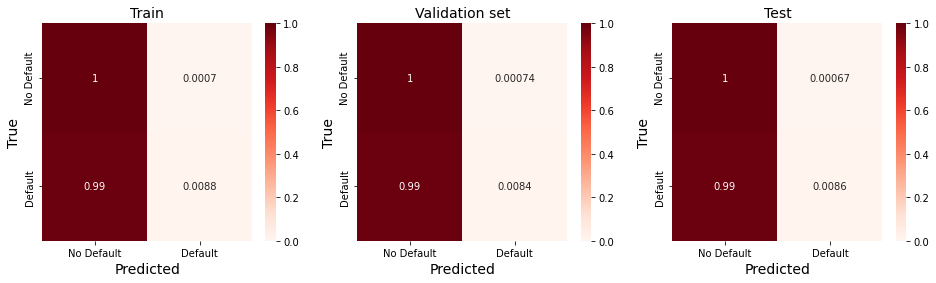

In [ ]:
# Create confusion matrix for the best model
# roc curve, precision recall curve for each model
class_labels = ["No Default","Default"]

fprs, tprs, precisions, recalls, names, scores, cvscores, pvalues, accuracy, cnfmatrix = list(), list(), list(), list(), list(), list(), list(), list(), list(), list()
features_list, final_best_clf,results = {}, {},[]



def plot_confusion_matrices(model, X_train_data, y_train_data, X_test_data, y_test_data, X_valid_data, y_valid_data, cnfmatrix):
    # Predictions
    preds_test = model.predict(X_test_data)
    preds_train = model.predict(X_train_data)
    preds_valid = model.predict(X_valid_data)

    # Calculate confusion matrices
    train_confusion_matrix = confusion_matrix(y_train_data, preds_train).astype(np.float32)
    train_confusion_matrix /= train_confusion_matrix.sum(axis=1)[:, np.newaxis]

    test_confusion_matrix = confusion_matrix(y_test_data, preds_test).astype(np.float32)
    test_confusion_matrix /= test_confusion_matrix.sum(axis=1)[:, np.newaxis]

    valid_confusion_matrix = confusion_matrix(y_valid_data, preds_valid).astype(np.float32)
    valid_confusion_matrix /= valid_confusion_matrix.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrices
    plt.figure(figsize=(16, 4))

    plt.subplot(131)
    g = sns.heatmap(train_confusion_matrix, vmin=0, vmax=1, annot=True, cmap="Reds")
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("True", fontsize=14)
    g.set(xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Train", fontsize=14)

    plt.subplot(132)
    g = sns.heatmap(valid_confusion_matrix, vmin=0, vmax=1, annot=True, cmap="Reds")
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("True", fontsize=14)
    g.set(xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Validation set", fontsize=14);

    plt.subplot(133)
    g = sns.heatmap(test_confusion_matrix, vmin=0, vmax=1, annot=True, cmap="Reds")
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("True", fontsize=14)
    g.set(xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Test", fontsize=14)

    # Append confusion matrix of the test set
    cnfmatrix.append(test_confusion_matrix)

    return cnfmatrix


cnfmatrix = plot_confusion_matrices(model,X_train,y_train,X_test,y_test,X_valid, y_valid,cnfmatrix)


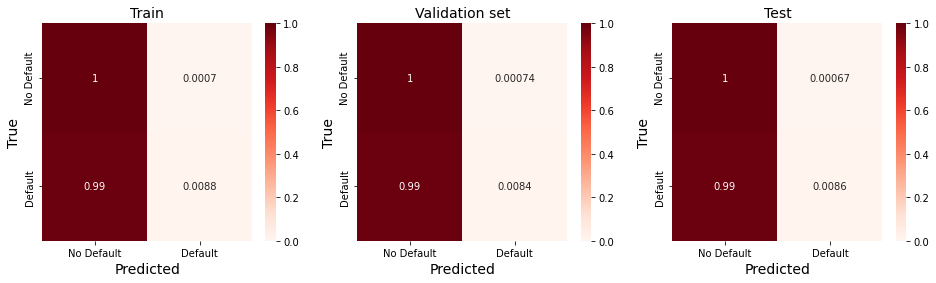

In [ ]:
# Confusion matrix for baseline model
_=plot_confusion_matrices(model,X_train,y_train,X_test,y_test,X_valid, y_valid,cnfmatrix)



**Function for AUC (Area under ROC curve)**


In [ ]:

def roc_curve_cust(model, X_train_data, y_train_data, X_test_data, y_test_data, X_valid_data, y_valid_data, fprs, tprs, name):
    fpr, tpr, threshold = roc_curve(y_test_data, model.predict_proba(X_test_data)[:, 1])
    fprs.append(fpr)
    tprs.append(tpr)
    train_roc_display = RocCurveDisplay.from_estimator(model, X_train_data, y_train_data, name="TrainRocAuc")
    test_roc_display = RocCurveDisplay.from_estimator(model, X_test_data, y_test_data, name="TestRocAuc", ax=train_roc_display.ax_)
    valid_roc_display = RocCurveDisplay.from_estimator(model, X_valid_data, y_valid_data, name="ValidRocAuc", ax=test_roc_display.ax_)
    valid_roc_display.ax_.set_title("ROC Curve Comparison - " + name)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)
    plt.show()
    return fprs, tprs

## Algorithm and ensemble experiments from hyperparameter tuning (Step2-4)

Now, we will go through the experiments for the following 4 acheivements.

- Algorithm Selection: Explore various algorithms such as decision trees, random forests, GBMs, neural networks, SVMs, and KNN, considering their strengths and weaknesses to find the best fit for your dataset.

- Hyperparameter Tuning: Optimize algorithm performance by adjusting hyperparameters using techniques like grid search, random search, or Bayesian optimization, controlling aspects like model complexity, regularization, and learning rate.

- Model Evaluation: Assess model performance using metrics like accuracy, precision, recall, F1 score, and AUC-ROC, ensuring validation on a separate dataset to gauge generalization ability.

- Ensembling: Combine predictions from multiple models using techniques like bagging, boosting, or stacking to improve overall performance by leveraging the strengths of individual models and mitigating their weaknesses.



**Grid Search and RFE from adjusting hyper parameters**

In [ ]:
data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [ ]:
# !pip install lightgbm

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, classification_report, roc_auc_score, make_scorer
from scipy import stats
import json
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, ConfusionMatrixDisplay, precision_recall_curve,
                             explained_variance_score, RocCurveDisplay, PrecisionRecallDisplay)

### Setting the algorithm and ensemble and tuning hyper parameters


In [ ]:
classifiers = [
        [('Logistic Regression', LogisticRegression(solver='saga',random_state=42, max_iter = 100),"RFE")],
        [('Support Vector', SVC(random_state=42,probability=True),"SVM")],
        [('Gradient Boosting', GradientBoostingClassifier(warm_start=True, random_state=42),"RFE")],
        [('XGBoost', XGBClassifier(random_state=42),"RFE")],
        [('Light Gradient-Boosting Machine', LGBMClassifier(boosting_type='gbdt', random_state=42),"RFE")],
        [('Random Forest', RandomForestClassifier(random_state=42),"RFE")]
    ]

In [ ]:
# Define grid search parameters for each classifier
params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2','elasticnet'),
            'tol': (0.01, 0.001),
            'C': (1, 0.01),
        },
    'Gradient Boosting':  {
            'max_depth': [5,10], # Lowering helps with overfitting.
            'max_features': [5,10],
            'validation_fraction': [0.2],
            'n_iter_no_change': [10],
            'tol': [0.1,0.01],
            'n_estimators':[1000],
            'subsample' : [0.8],   #It represents the fraction of observations to be randomly sampled for each tree.
            'min_samples_leaf' : [3,5],
        },
        'XGBoost':  {
            'max_depth': [3,5], # Lowering max depth helps with overfitting.
            'n_estimators':[300,500],
            'gamma': [0, 1, 10, 100],
            'eta' : [0.001, 0.01,0.1],
            'colsample_bytree' : [0.2,0.5],
        },
        'Light Gradient-Boosting Machine':  {
            'n_estimators':[1000],
            'learning_rate': [0.01],
            'boosting_type':['goss','dart'],
            'max_depth': [2],  # Lowering max depth helps with overfitting.
            'num_leaves': [5], # = max depth
            'max_bin' : [100],  #Setting max bin to high values has a similar effect as increasing the value of num_leaves.
        },

        'Random Forest':  {
            'min_samples_split': [5],
            'min_samples_leaf': [5],
            'n_estimators':[10, 20],
            'max_depth': [5],
            'max_features': [10, 13]
        },
        'Support Vector' : {
            'kernel': ('rbf','poly'),
            'degree': (4, 5),
            'C': ( 0.01, 0.1),   #Allowing for misclassification due to low C.
            'gamma':(0.1, 1)  #Low gamma results in high variance and low bias.
        }

    }

In [ ]:
# Set feature selection settings
feature_selection_steps = 0.5  # Features removed each step
features_used = len(selected_features)  # Number of features used
features_used

14

In [ ]:
def precision_recall_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,precisions,recalls,name):
    # plot precision_recall Test
    precision, recall, threshold = precision_recall_curve(y_test,model.predict_proba(X_test)[:, 1])
    precisions.append(precision)
    recalls.append(recall)

    # plot combined Precision Recall curve for train, valid, test
    show_train_precision = RocCurveDisplay.from_estimator(model, X_train, y_train, name="TrainPresRecal")
    show_test_precision = RocCurveDisplay.from_estimator(model, X_test, y_test, name="TestPresRecal", ax=show_train_precision.ax_)
    show_valid_precision = RocCurveDisplay.from_estimator(model, X_valid, y_valid, name="ValidPresRecal", ax=show_test_precision.ax_)
    show_valid_precision.ax_.set_title ("Precision Recall Curve Comparison - " + name)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)
    plt.show()
    return precisions,recalls


In [ ]:
try:
    Log
except NameError:
    Log = pd.DataFrame(columns=["exp_name",
                                   "Train Acc",
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC",
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train F1 Score",
                                   "Valid F1 Score",
                                   "Test F1 Score",
                                   "Train Log Loss",
                                   "Valid Log Loss",
                                   "Test Log Loss",
                                   "P Score"
                                  ])

# roc curve, precision recall curve for each model
pvalues, accuracy, fprs, recalls, names, tprs, precisions, scores, cvscores, cnfmatrix = list(), list(), list(), list(), list(), list(), list(), list(), list(), list()
features_list, final_best_clf,results = {}, {},[]

In [ ]:
import pickle
metrics = {'accuracy': make_scorer(accuracy_score),
            'roc_auc': 'roc_auc',
            'f1': make_scorer(f1_score),
            'log_loss': make_scorer(log_loss)
          }


# Set up classifier names and initialize empty lists for confusion matrices, ROC curves, and precision-recall curves
names = ['Baseline LR']


def RunGridResearch(in_classifiers, confusion_matrices, fprs, tprs, precisions, recalls):
    # Iterate over classifiers and their parameters
    for (name, classifier, ft_sel) in in_classifiers:
            # Print classifier name and its parameters
            print('---- ', name,' Start----')
            parameters = params_grid[name]
            print("Parameters are :")
            for p in sorted(parameters.keys()):
                print("\t"+str(p)+": "+ str(parameters[p]))

            # Generate pipeline from the feature selection method
            if ft_sel == "SVM":
                full_pipeline_with_predictor = Pipeline([
                ("preparation", data_prep_pipeline),
                ("predictor", classifier)
                ])
            else:
                full_pipeline_with_predictor = Pipeline([
                ("preparation", data_prep_pipeline),
                ('RFE', RFE(estimator=classifier, n_features_to_select=features_used, step=feature_selection_steps)),
                ("predictor", classifier)
                ])

            # Running grid search
            params = {}
            for p in parameters.keys():
                pipe_key = 'predictor__'+str(p)
                params[pipe_key] = parameters[p]
            grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=cvSplits, scoring='roc_auc',
                                       n_jobs=10, verbose=1)
            grid_search.fit(X_train, y_train)

            # Print cross-validation scores with the best estimator
            best_train = pct(grid_search.best_score_)
            print("Cross validation using best estimator")
            best_train_scores = cross_validate(grid_search.best_estimator_, X_train, y_train, cv=cvSplits, scoring=metrics,
                                               return_train_score=True, n_jobs=10)

            # Collect training and validation scores
            train_accuracy_best = np.round(best_train_scores['train_accuracy'].mean(), 4)
            valid_accuracy_best = np.round(best_train_scores['test_accuracy'].mean(), 4)

            train_f1_best = np.round(best_train_scores['train_f1'].mean(), 4)
            valid_f1_best = np.round(best_train_scores['test_f1'].mean(), 4)

            train_logloss_best = np.round(best_train_scores['train_log_loss'].mean(), 4)
            valid_logloss_best = np.round(best_train_scores['test_log_loss'].mean(), 4)

            train_roc_auc_best = np.round(best_train_scores['train_roc_auc'].mean(), 4)
            valid_roc_auc_best = np.round(best_train_scores['test_roc_auc'].mean(), 4)
            valid_time = np.round(best_train_scores['score_time'].mean(), 4)


            # Append results
            results.append(best_train_scores['train_accuracy'])
            names.append(name)

            # Conduct t-test with baseline logit and best estimator
            (t_stat, p_value) = stats.ttest_rel(logit_scores['train_roc_auc'], best_train_scores['train_roc_auc'])

            # Fit and predict with the best estimator
            print("Fitting and Predicting using the best estimator")
            start = time()
            model = grid_search.best_estimator_.fit(X_train, y_train)
            print('Pickeling the Model')
            pickle.dump(model, open(f"RFE_best_model_{name}.pkl", "wb"))
            train_time = round(time() - start, 4)

            # Predictions
            start = time()
            y_test_pred = model.predict(X_test)
            test_time = round(time() - start, 4)
            scores.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
            accuracy.append(accuracy_score(y_test, y_test_pred))

            # Create confusion matrix for the best model
            confusion_matrices = plot_confusion_matrices(model, X_train, y_train, X_test, y_test, X_valid, y_valid, confusion_matrices)

            # Create AUC ROC curve
            fprs, tprs = roc_curve_cust(model, X_train, y_train, X_test, y_test, X_valid, y_valid, fprs, tprs, name)

            # Create Precision-Recall curve
            precisions, recalls = precision_recall_cust(model, X_train, y_train, X_test, y_test, X_valid, y_valid, precisions, recalls, name)

            # Best Model
            final_best_clf[name] = pd.DataFrame([{'label': grid_search.best_estimator_.named_steps['predictor'].__class__.__name__,
                                           'predictor': grid_search.best_estimator_.named_steps['predictor']}])


            # Collect the best parameters from the grid search
            print("Best Parameters depicted from our experiments are:")
            best_parameters = grid_search.best_estimator_.get_params()
            param_dump = []
            for param_name in sorted(params.keys()):
                param_dump.append((param_name, (best_parameters[param_name])))
                print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
            print("---- ",name," Finish ---- ")
            print("")

            # Record the results
            exp_name = name
            Log.loc[len(Log)] = [f"{exp_name}"] + list(np.round(
               [train_accuracy_best,
                    valid_accuracy_best,
                    accuracy_score(y_test, y_test_pred),
                    train_roc_auc_best,
                    valid_roc_auc_best,
                    roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                    train_f1_best,
                    valid_f1_best,
                    f1_score(y_test, y_test_pred),
                    train_logloss_best,
                    valid_logloss_best,
                    log_loss(y_test, y_test_pred),
                    p_value], 4))



In [ ]:
def featureAnalysis(picked_model,name):
    # Unpickling the best pipeline
    with open(picked_model, 'rb') as file:
        model = pickle.load(file)
    # Getting the OHE feature names
    cat_attribs = model.named_steps['preparation'].transformer_list[1][1].named_steps['ohe'].get_feature_names_out()
    feature_list = list(num_attribs) + list(cat_attribs)

    rfe = model.named_steps['RFE']
    #names.append(name)
    features_list[name] = pd.DataFrame({'feature_name': feature_list,
                                         'feature_importance': rfe.ranking_[:200]})
    for i in range(len(feature_list)):
        print(f"Feature {feature_list[i]}: Selected (Rank: {rfe.ranking_[i]})")

----  Logistic Regression  Start----
Parameters are :
	C: (1, 0.01)
	penalty: ('l1', 'l2', 'elasticnet')
	tol: (0.01, 0.001)
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Cross validation using best estimator
Fitting and Predicting using the best estimator
Pickeling the Model


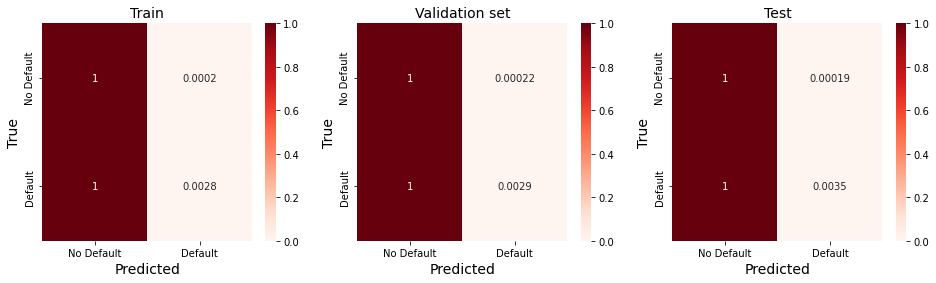

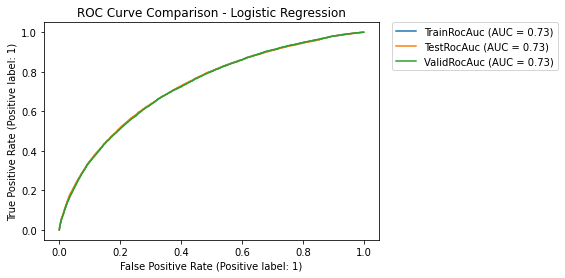

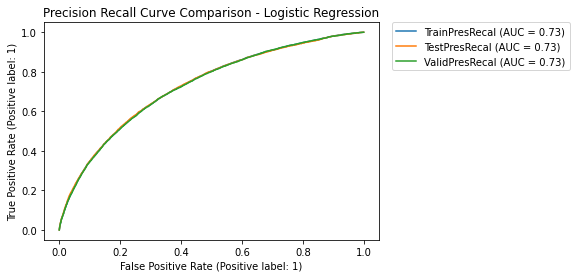

Best Parameters depicted from our experiments are:
	predictor__C: 1
	predictor__penalty: l2
	predictor__tol: 0.001
----  Logistic Regression  Finish ---- 



In [ ]:
RunGridResearch(classifiers[0],cnfmatrix,fprs,tprs,precisions,recalls)

In [ ]:
featureAnalysis('RFE_best_model_Logistic Regression.pkl', 'Logistic Regression')

Feature AMT_INCOME_TOTAL: Selected (Rank: 3)
Feature AMT_CREDIT: Selected (Rank: 3)
Feature DAYS_EMPLOYED: Selected (Rank: 3)
Feature DAYS_BIRTH: Selected (Rank: 3)
Feature EXT_SOURCE_1: Selected (Rank: 2)
Feature EXT_SOURCE_2: Selected (Rank: 1)
Feature EXT_SOURCE_3: Selected (Rank: 1)
Feature x0_F: Selected (Rank: 2)
Feature x0_M: Selected (Rank: 2)
Feature x0_XNA: Selected (Rank: 3)
Feature x1_N: Selected (Rank: 1)
Feature x1_Y: Selected (Rank: 1)
Feature x2_N: Selected (Rank: 1)
Feature x2_Y: Selected (Rank: 1)
Feature x3_Cash loans: Selected (Rank: 1)
Feature x3_Revolving loans: Selected (Rank: 1)
Feature x4_Academic degree: Selected (Rank: 3)
Feature x4_Higher education: Selected (Rank: 1)
Feature x4_Incomplete higher: Selected (Rank: 2)
Feature x4_Lower secondary: Selected (Rank: 3)
Feature x4_Secondary / secondary special: Selected (Rank: 2)
Feature x5_Accountants: Selected (Rank: 2)
Feature x5_Cleaning staff: Selected (Rank: 3)
Feature x5_Cooking staff: Selected (Rank: 3)
Feat

In [ ]:
gc.collect()


21285

In [ ]:
Log

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score,Train Log Loss,Valid Log Loss,Test Log Loss,P Score
0,Logistic Regression,0.9209,0.9212,0.9218,0.7279,0.7284,0.728,0.0058,0.0058,0.0069,2.7304,2.7208,2.7008,0.0017


#### Gradient Boosting


----  Gradient Boosting  Start----
Parameters are :
	max_depth: [5, 10]
	max_features: [5, 10]
	min_samples_leaf: [3, 5]
	n_estimators: [1000]
	n_iter_no_change: [10]
	subsample: [0.8]
	tol: [0.1, 0.01]
	validation_fraction: [0.2]
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Cross validation using best estimator
Fitting and Predicting using the best estimator
Pickeling the Model


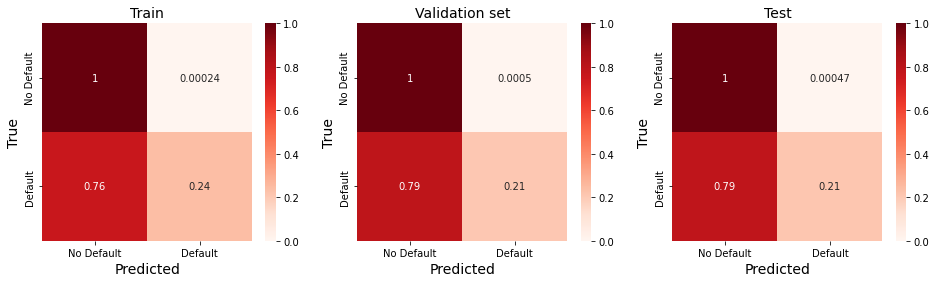

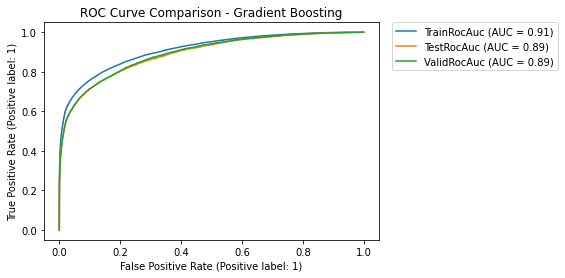

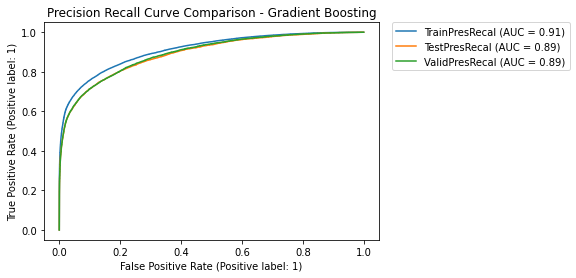

Best Parameters depicted from our experiments are:
	predictor__max_depth: 10
	predictor__max_features: 10
	predictor__min_samples_leaf: 3
	predictor__n_estimators: 1000
	predictor__n_iter_no_change: 10
	predictor__subsample: 0.8
	predictor__tol: 0.01
	predictor__validation_fraction: 0.2
----  Gradient Boosting  Finish ---- 



In [ ]:
RunGridResearch(classifiers[2],cnfmatrix,fprs,tprs,precisions,recalls)

In [ ]:
featureAnalysis('RFE_best_model_Gradient Boosting.pkl','Gradient Boosting')

Feature AMT_INCOME_TOTAL: Selected (Rank: 1)
Feature AMT_CREDIT: Selected (Rank: 1)
Feature DAYS_EMPLOYED: Selected (Rank: 1)
Feature DAYS_BIRTH: Selected (Rank: 1)
Feature EXT_SOURCE_1: Selected (Rank: 1)
Feature EXT_SOURCE_2: Selected (Rank: 1)
Feature EXT_SOURCE_3: Selected (Rank: 1)
Feature x0_F: Selected (Rank: 2)
Feature x0_M: Selected (Rank: 1)
Feature x0_XNA: Selected (Rank: 3)
Feature x1_N: Selected (Rank: 3)
Feature x1_Y: Selected (Rank: 3)
Feature x2_N: Selected (Rank: 1)
Feature x2_Y: Selected (Rank: 1)
Feature x3_Cash loans: Selected (Rank: 1)
Feature x3_Revolving loans: Selected (Rank: 2)
Feature x4_Academic degree: Selected (Rank: 3)
Feature x4_Higher education: Selected (Rank: 1)
Feature x4_Incomplete higher: Selected (Rank: 3)
Feature x4_Lower secondary: Selected (Rank: 3)
Feature x4_Secondary / secondary special: Selected (Rank: 1)
Feature x5_Accountants: Selected (Rank: 3)
Feature x5_Cleaning staff: Selected (Rank: 3)
Feature x5_Cooking staff: Selected (Rank: 3)
Feat

In [ ]:
gc.collect()


21765

In [ ]:
Log

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score,Train Log Loss,Valid Log Loss,Test Log Loss,P Score
0,Logistic Regression,0.9209,0.9212,0.9218,0.7279,0.7284,0.7280,0.0058,0.0058,0.0069,2.7304,2.7208,2.7008,0.0017
1,Gradient Boosting,0.9332,0.9312,0.9379,0.8804,0.8585,0.8904,0.2729,0.2351,0.3486,2.3087,2.3765,2.1453,0.0003


#### XGBoost

In [ ]:
# RunGridResearch(classifiers[3],cnfmatrix,fprs,tprs,precisions,recalls)


----  XGBoost  Start----
Parameters are :
	colsample_bytree: [0.2, 0.5]
	eta: [0.001, 0.01, 0.1]
	gamma: [0, 1, 10, 100]
	max_depth: [3, 5]
	n_estimators: [300, 500]
Fitting 3 folds for each of 96 candidates, totalling 288 fits


KeyboardInterrupt: 

In [ ]:
# featureAnalysis('RFE_best_model_XGBoost.pkl')

In [ ]:
# Log

#### Random Forest

In [ ]:
# RunGridResearch(classifiers[5],cnfmatrix,fprs,tprs,precisions,recalls)

----  Random Forest  Start----
Parameters are :
	max_depth: [5]
	max_features: [10, 13]
	min_samples_leaf: [5]
	min_samples_split: [5]
	n_estimators: [10, 20]
Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
# featureAnalysis('RFE_best_model_Random Forest.pkl')

In [ ]:
# Log

# Model Validation (Step5)


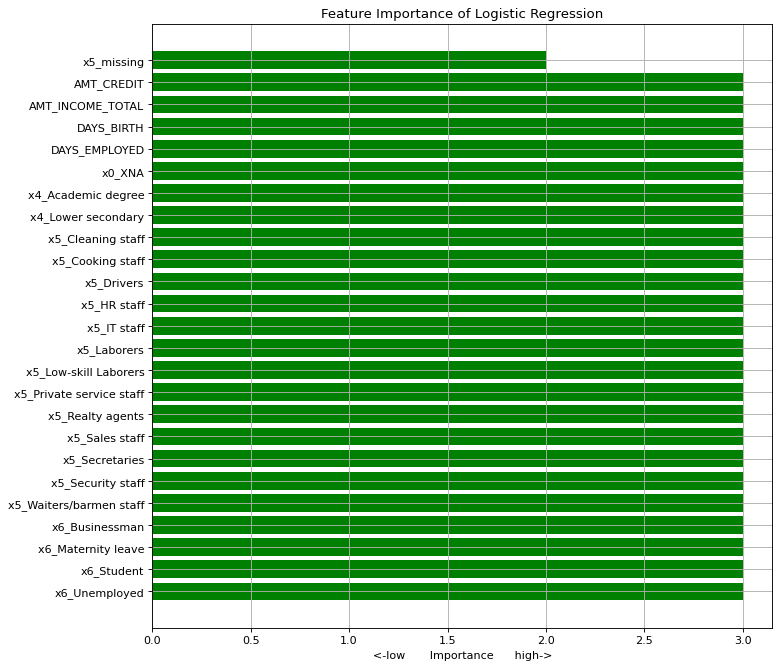

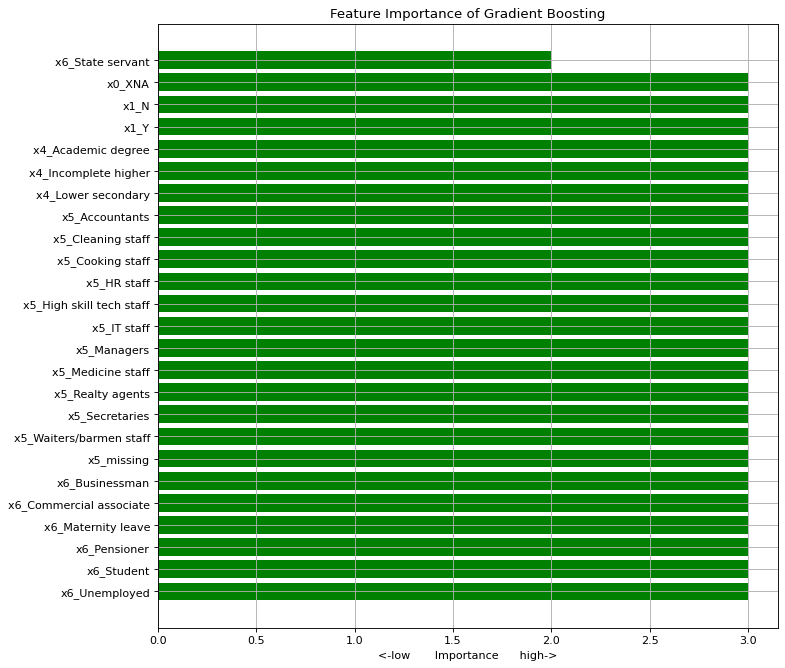

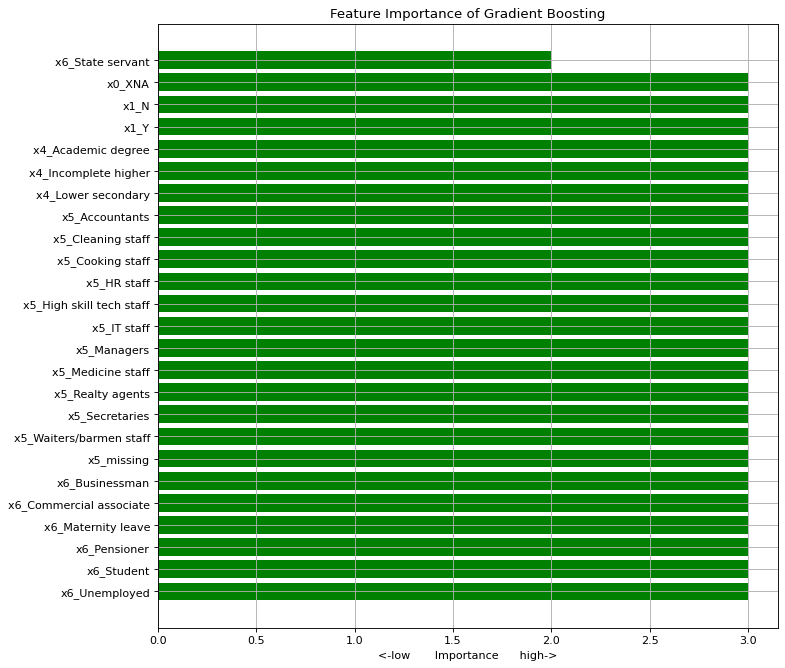

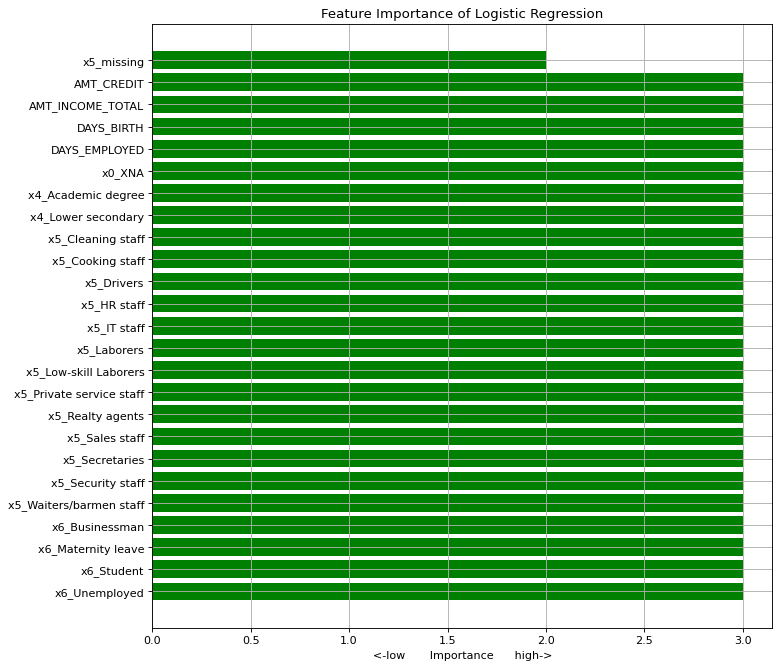

In [ ]:
for name in names[1:-1]:
    plt.figure(figsize=(10, 10), dpi=80)
    features_df = features_list[name].sort_values(by=['feature_importance', 'feature_name'], ascending=[False, False])
    orderednames = np.array(features_df.head(25)['feature_name'])
    Importancesinorder = np.array(features_df.head(25)['feature_importance'])

    #Setting option for visulizing the graphs.
    plt.barh(range(len(orderednames)), Importancesinorder, color='g', align='center')
    plt.xlabel('<-low       Importance      high->')
    plt.yticks(range(len(orderednames)), orderednames)

    #Explain each axis
    plt.title(f'Feature Importance of {name}')
    plt.grid()
    plt.show()

#### Boxplot Comparison with Cross Validation Results


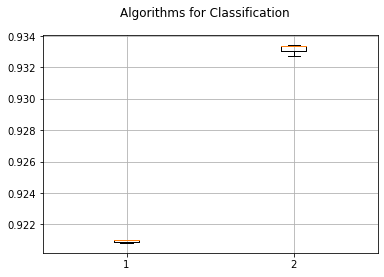

In [ ]:
# Boxplots for the previous feature engineering
fig = pyplot.figure()
fig.suptitle('Algorithms for Classification')

# Setting the subplots
subax = fig.add_subplot(111)
pyplot.boxplot(results)
#subax.set_xticklabels(names)
pyplot.grid()
pyplot.show()

#### AUC : Area Under the ROC Curve


['Baseline LR', 'Logistic Regression', 'Gradient Boosting']


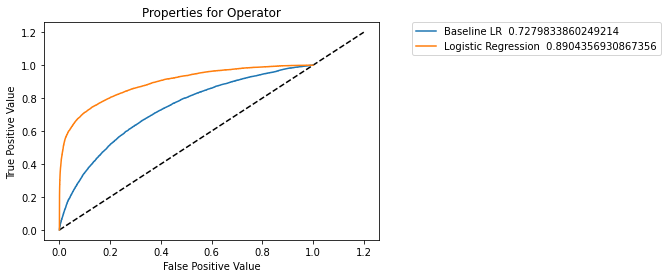

In [ ]:
print(names)
# ROC fore each classifier
plt.plot([0,1.2],[0,1.2], 'k--')
for i in range(len(names)-1):
    plt.plot(fprs[i],tprs[i],label = names[i] + '  ' + str(scores[i]))

#Making the description by option for visulization
plt.legend(bbox_to_anchor=(1.1,1), loc="upper left", borderaxespad=0)
plt.xlabel("False Positive Value")
plt.ylabel("True Positive Value")
plt.title('Properties for Operator')
plt.show()


#### Precision Recall Curve


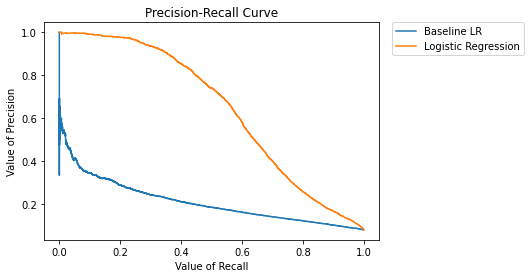

In [ ]:
# Precision recall curve for each of the classifier
for i in range(len(names)-1):
    plt.plot(recalls[i],precisions[i],label = names[i])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)

#Making the description by option for visulization
plt.xlabel("Value of Recall")
plt.ylabel("Value of Precision")
plt.title('Precision-Recall Curve')
plt.show()

#### Confusion Matrix

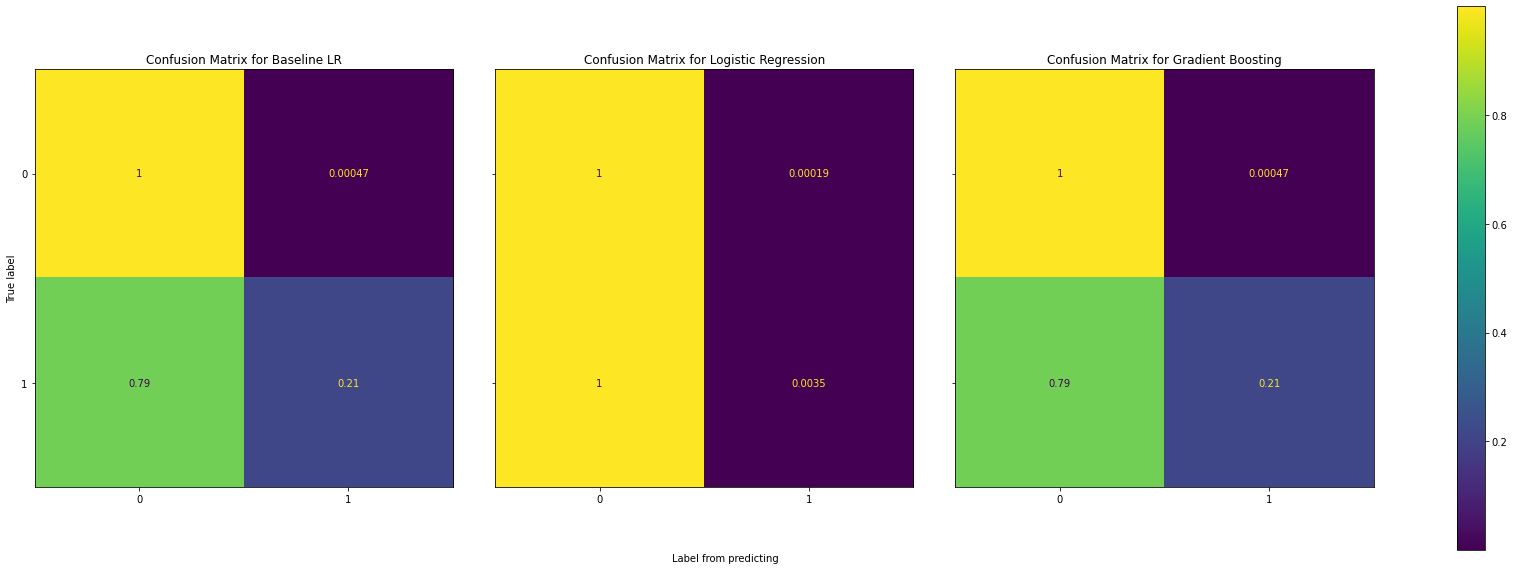

In [ ]:
# Setting confusion matrix for each of the classifier
f, axes = plt.subplots(1, len(names), figsize=(30, 10), sharey='row')
for i in range(len(names)):
    #Labeling
    disp = ConfusionMatrixDisplay(cnfmatrix[i-1], display_labels=['0', '1'])

    #Plotting
    disp.plot(ax=axes[i], xticks_rotation=0)

    #Visualization
    disp.ax_.set_title("Confusion Matrix for " + names[i])
    disp.ax_.set_xlabel('')
    disp.im_.colorbar.remove()
    if i!=0:
        disp.ax_.set_ylabel('')

# Text
f.text(0.42, 0.11, 'Label from predicting', ha='left')
plt.subplots_adjust(wspace=0.10, hspace=0.1)

#Add color
f.colorbar(disp.im_, ax=axes)
plt.show()

#### Reuslts for the best classification method


In [ ]:
pd.set_option('display.max_colwidth', None)
Log

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score,Train Log Loss,Valid Log Loss,Test Log Loss,P Score
0,Logistic Regression,0.9209,0.9212,0.9218,0.7279,0.7284,0.7280,0.0058,0.0058,0.0069,2.7304,2.7208,2.7008,0.0017
1,Gradient Boosting,0.9332,0.9312,0.9379,0.8804,0.8585,0.8904,0.2729,0.2351,0.3486,2.3087,2.3765,2.1453,0.0003


In [ ]:
final_best_clf
model_selection = ['Logistic Regression','Gradient Boosting']


# Model selection from selecting the best k value- Adjusting baseline model(Step 6)

To find the best model, algorithm of classification(SelectkBest module of sk-learning) is employed.

We will use Cross fold Accuracy, p-value, ROC_AUC_Score, F1_Score and LogLoss with Confusion matrix.

In [ ]:
# Initialize Arrays we used

del fprs[1:]
del accuracy[1:]
del cnfmatrix[1:]
del precisions[1:]
del recalls[1:]
del names[1:]
del scores[1:]
del cvscores[1:]
del tprs[1:]
del pvalues[1:]
del results[1:]

#Define empty objects
final_best_clf,results = {}, {}



In [ ]:
print(names)


['Baseline LR']


#### Preparation for Pipeline

In [ ]:
classifiers = [
        [('Logistic Regression', LogisticRegression(solver='saga',random_state=42),"SelectKbest")],
        [('Gradient Boosting', GradientBoostingClassifier(warm_start=True, random_state=42),"SelectKbest")],
        [('Random Forest', RandomForestClassifier(random_state=42),"SelectKbest")]
    ]

#### Models and hyper parameter palettee


In [ ]:
# Arrange grid search parameters for each classifier
params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2','elasticnet'),
            'tol': (0.0001, 0.00001),
            'C': (10, 1, 0.1, 0.01),
        },
    'Gradient Boosting':  {
            'max_depth': [5,10], # Lowering helps with overfitting.
            'max_features': [5,10],
            'validation_fraction': [0.2],
            'n_iter_no_change': [10],
            'tol': [0.1,0.01],
            'n_estimators':[1000],
            'subsample' : [0.8],   #It represents the fraction of observations to be randomly sampled for each tree.
            'min_samples_leaf' : [3,5],
        },
#         'Random Forest':  {
#             'min_samples_split': [5],
#             'min_samples_leaf': [5],
#             'n_estimators':[10, 20],
#             'max_depth': [5],
#             'max_features': [10, 13]
    }

## Process The Grid Search


In [ ]:
results = []
results.append(logit_scores['train_accuracy'])
def RunGridResearch(in_classifiers,cnfmatrix,fprs,tprs,precisions,recalls):
    for (name, classifier,ft_sel) in in_classifiers:
            # Print classifier name and its parameters
            print('---- ', name,' Start----')
            parameters = params_grid[name]
            print("Parameters are :")
            for p in sorted(parameters.keys()):
                print("\t"+str(p)+": "+ str(parameters[p]))

            # Generate pipeline from the feature selection method
            full_pipeline_with_predictor = Pipeline([
                ("preparation", data_prep_pipeline),
                ('SelectKbest',SelectKBest(score_func=mutual_info_classif, k=features_used)),
                ("predictor", classifier)
                ])

            # Running grid search
            params = {}
            for p in parameters.keys():
                pipe_key = 'predictor__'+str(p)
                params[pipe_key] = parameters[p]
            grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=cvSplits, scoring='roc_auc',
                                       n_jobs=10,verbose=1)
            grid_search.fit(X_train, y_train)


            best_train = pct(grid_search.best_score_)

            # Print cross-validation scores with the best estimator
            print("Best Parameters depicted from our experiments are:")
            best_train_scores = cross_validate(grid_search.best_estimator_, X_train, y_train,cv=cvSplits,scoring=metrics,
                                               return_train_score=True, n_jobs=10)

            # Collect training and validation scores
            train_accuracy_best = np.round(best_train_scores['train_accuracy'].mean(), 4)
            valid_accuracy_best = np.round(best_train_scores['test_accuracy'].mean(), 4)

            train_f1_best = np.round(best_train_scores['train_f1'].mean(), 4)
            valid_f1_best = np.round(best_train_scores['test_f1'].mean(), 4)

            train_logloss_best = np.round(best_train_scores['train_log_loss'].mean(), 4)
            valid_logloss_best = np.round(best_train_scores['test_log_loss'].mean(), 4)

            train_roc_auc_best = np.round(best_train_scores['train_roc_auc'].mean(), 4)
            valid_roc_auc_best = np.round(best_train_scores['test_roc_auc'].mean(), 4)
            valid_time = np.round(best_train_scores['score_time'].mean(), 4)

            # Append results
            results.append(best_train_scores['train_accuracy'])
            names.append(name)

            # t-test with best estimator
            (t_stat, p_value) = stats.ttest_rel(logit_scores['train_roc_auc'], best_train_scores['train_roc_auc'])

            # Fit and predict with the best estimator
            print("Fitting and Predicting using the best estimator")
            start = time()
            model = grid_search.best_estimator_.fit(X_train, y_train)
            print('Pickeling the Model')
            pickle.dump(model, open(f"SelectKbest_best_model_{name}.pkl", "wb"))
            train_time = round(time() - start, 4)

            # Best estimator prediction time
            start = time()
            y_test_pred = model.predict(X_test)
            test_time = round(time() - start, 4)
            scores.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
            accuracy.append(accuracy_score(y_test, y_test_pred))

            # Confusion matrix of the best model
            cnfmatrix = plot_confusion_matrices(model,X_train,y_train,X_test,y_test,X_valid, y_valid,cnfmatrix)

            # AUC ROC curve
            fprs,tprs = roc_curve_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,fprs,tprs,name)

            # Precision recall curve
            precisions,recalls = precision_recall_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,precisions,recalls,name)

            #Best Model
            final_best_clf[name]=pd.DataFrame([{'label': grid_search.best_estimator_.named_steps['predictor'].__class__.__name__,
                                           'predictor': grid_search.best_estimator_.named_steps['predictor']}])

            # Collect the best parameters from the grid search
            print("Best Parameters:")
            best_parameters = grid_search.best_estimator_.get_params()
            paramdump = []
            for param_name in sorted(params.keys()):
                paramdump.append((param_name, (best_parameters[param_name])))
                print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
            print("---- ",name," Finish ---- ")
            print("")

            # Record the results
            exp_name = name
            Log.loc[len(Log)] = [f"{exp_name}"] + list(np.round(
               [train_accuracy_best,
                    valid_accuracy_best,
                    accuracy_score(y_test, y_test_pred),
                    train_roc_auc_best,
                    valid_roc_auc_best,
                    roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                    train_f1_best,
                    valid_f1_best,
                    f1_score(y_test, y_test_pred),
                    train_logloss_best,
                    valid_logloss_best,
                    log_loss(y_test, y_test_pred),
                    p_value], 4))

#### Logistic Regression


----  Logistic Regression  Start----
Parameters are :
	C: (10, 1, 0.1, 0.01)
	penalty: ('l1', 'l2', 'elasticnet')
	tol: (0.0001, 1e-05)
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters depicted from our experiments are:
Fitting and Predicting using the best estimator
Pickeling the Model


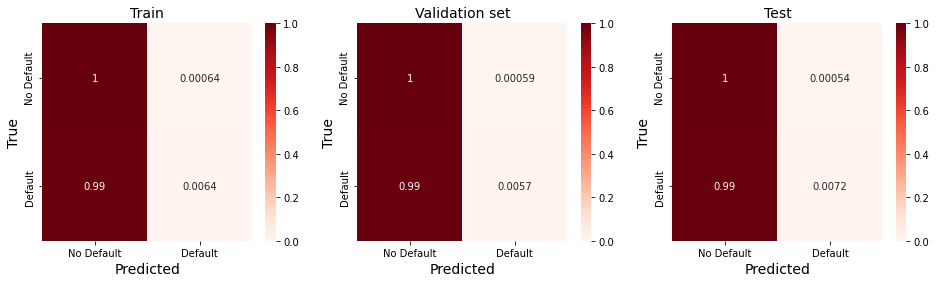

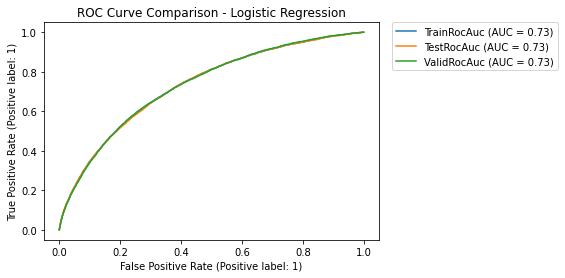

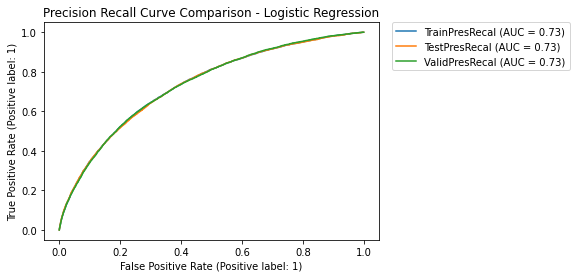

Best Parameters:
	predictor__C: 10
	predictor__penalty: l1
	predictor__tol: 0.0001
----  Logistic Regression  Finish ---- 



In [ ]:
RunGridResearch(classifiers[0],cnfmatrix,fprs,tprs,precisions,recalls)


In [ ]:
Log

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score,Train Log Loss,Valid Log Loss,Test Log Loss,P Score
0,Logistic Regression,0.9209,0.9212,0.9218,0.7279,0.7284,0.7280,0.0058,0.0058,0.0069,2.7304,2.7208,2.7008,0.0017
1,Gradient Boosting,0.9332,0.9312,0.9379,0.8804,0.8585,0.8904,0.2729,0.2351,0.3486,2.3087,2.3765,2.1453,0.0003
2,Logistic Regression,0.9207,0.9211,0.9218,0.7313,0.7314,0.7322,0.0127,0.0143,0.0143,2.7375,2.7263,2.7018,0.0065


#### Random Forest


In [ ]:
# RunGridResearch(classifiers[3],cnfmatrix,fprs,tprs,precisions,recalls)


In [ ]:
# Log

#### Gradient Boosting

----  Gradient Boosting  Start----
Parameters are :
	max_depth: [5, 10]
	max_features: [5, 10]
	min_samples_leaf: [3, 5]
	n_estimators: [1000]
	n_iter_no_change: [10]
	subsample: [0.8]
	tol: [0.1, 0.01]
	validation_fraction: [0.2]
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters depicted from our experiments are:
Fitting and Predicting using the best estimator
Pickeling the Model


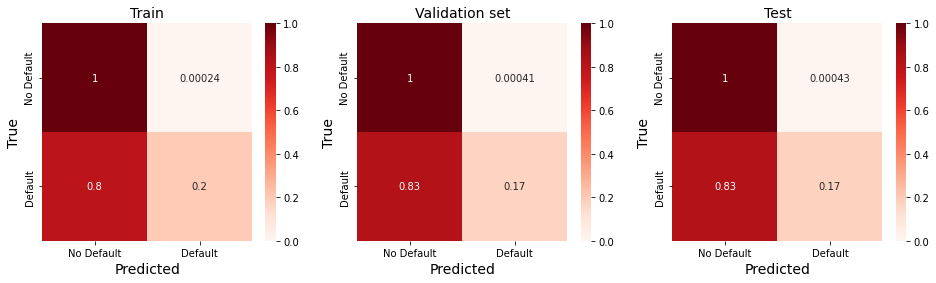

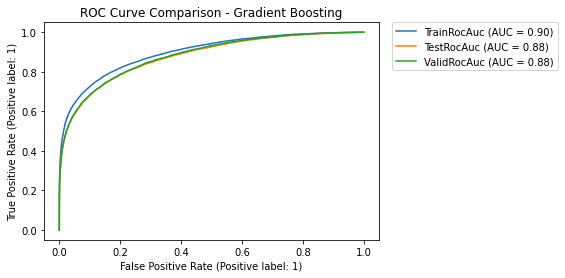

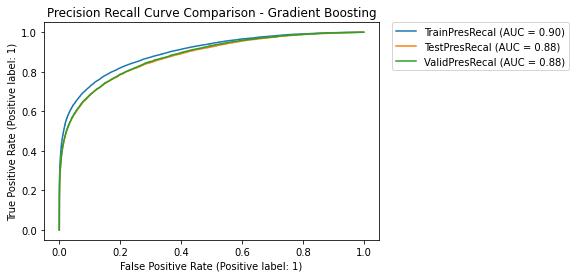

Best Parameters:
	predictor__max_depth: 10
	predictor__max_features: 10
	predictor__min_samples_leaf: 5
	predictor__n_estimators: 1000
	predictor__n_iter_no_change: 10
	predictor__subsample: 0.8
	predictor__tol: 0.01
	predictor__validation_fraction: 0.2
----  Gradient Boosting  Finish ---- 



In [ ]:
RunGridResearch(classifiers[1],cnfmatrix,fprs,tprs,precisions,recalls)


In [ ]:
Log

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score,Train Log Loss,Valid Log Loss,Test Log Loss,P Score
0,Logistic Regression,0.9209,0.9212,0.9218,0.7279,0.7284,0.7280,0.0058,0.0058,0.0069,2.7304,2.7208,2.7008,0.0017
1,Gradient Boosting,0.9332,0.9312,0.9379,0.8804,0.8585,0.8904,0.2729,0.2351,0.3486,2.3087,2.3765,2.1453,0.0003
2,Logistic Regression,0.9207,0.9211,0.9218,0.7313,0.7314,0.7322,0.0127,0.0143,0.0143,2.7375,2.7263,2.7018,0.0065
3,Gradient Boosting,0.9330,0.9311,0.9348,0.8754,0.8535,0.8773,0.2693,0.2337,0.2926,2.3145,2.3781,2.2521,0.0002


## Model Validation


### Boxplot Comparison with Cross Validation Results


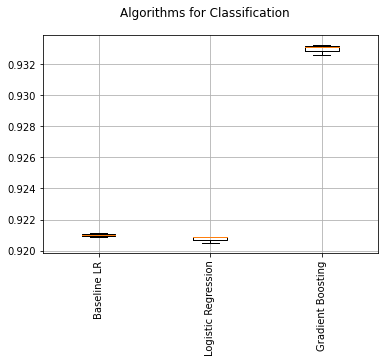

In [ ]:
# Boxplots for the previous feature engineering
fig = pyplot.figure()
fig.suptitle('Algorithms for Classification')

# Setting the subplots
subax = fig.add_subplot(111)
pyplot.boxplot(results)
subax.set_xticklabels(names,rotation=90)
pyplot.grid()
pyplot.show()

### AUC : Area Under the ROC Curve


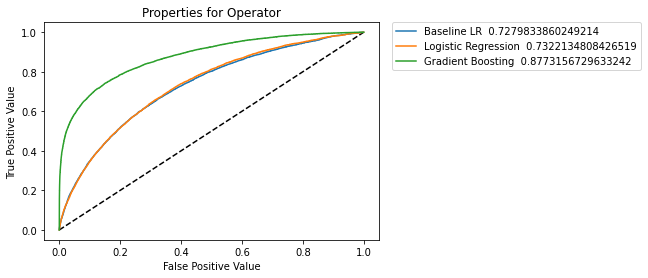

In [ ]:
# roc curve fpr, tpr  for all classifiers
plt.plot([0,1],[0,1], 'k--')
for i in range(len(names)):
    plt.plot(fprs[i],tprs[i],label = names[i] + '  ' + str(scores[i]))

#Making the description by option for visulization
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)
plt.xlabel("False Positive Value")
plt.ylabel("True Positive Value")
plt.title('Properties for Operator')
plt.show()

### Precision Recall Curve


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

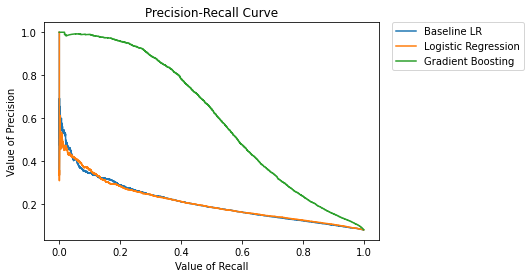

In [ ]:
# precision recall curve  for all classifiers
for i in range(len(names)):
    plt.plot(recalls[i],precisions[i],label = names[i])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)

#Making the description by option for visulization
plt.xlabel("Value of Recall")
plt.ylabel("Value of Precision")
plt.title('Precision-Recall Curve')
plt.show()


### Confusion Matrix


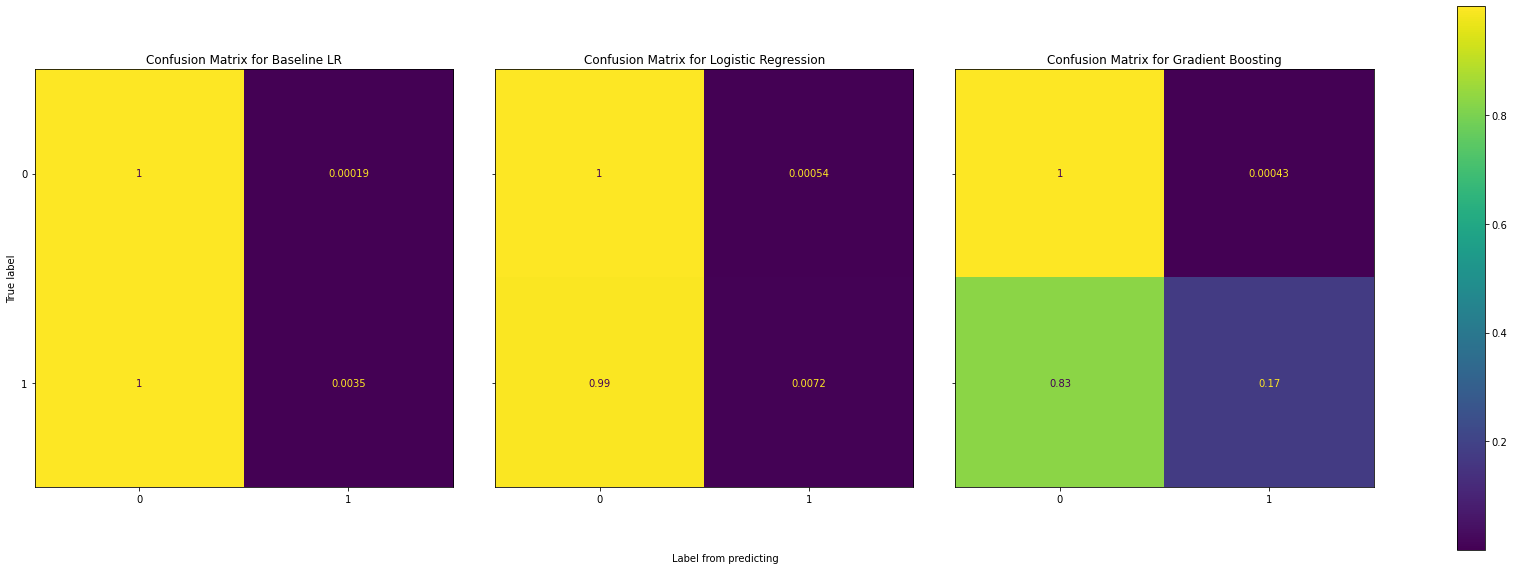

In [ ]:
# Setting confusion matrix for each of the classifier
f, axes = plt.subplots(1, len(names), figsize=(30, 10), sharey='row')
for i in range(len(names)):
    #Labeling
    disp = ConfusionMatrixDisplay(cnfmatrix[i], display_labels=['0', '1'])

    #Plotting
    disp.plot(ax=axes[i], xticks_rotation=0)

    #Visualization
    disp.ax_.set_title("Confusion Matrix for " + names[i])
    disp.ax_.set_xlabel('')
    disp.im_.colorbar.remove()
    if i!=0:
        disp.ax_.set_ylabel('')

# Text
f.text(0.42, 0.11, 'Label from predicting', ha='left')
plt.subplots_adjust(wspace=0.10, hspace=0.1)

#Add color
f.colorbar(disp.im_, ax=axes)
plt.show()

### Results from Model Selection


In [ ]:
pd.set_option('display.max_colwidth', None)
Log


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score,Train Log Loss,Valid Log Loss,Test Log Loss,P Score
0,Logistic Regression,0.9209,0.9212,0.9218,0.7279,0.7284,0.7280,0.0058,0.0058,0.0069,2.7304,2.7208,2.7008,0.0017
1,Gradient Boosting,0.9332,0.9312,0.9379,0.8804,0.8585,0.8904,0.2729,0.2351,0.3486,2.3087,2.3765,2.1453,0.0003
2,Logistic Regression,0.9207,0.9211,0.9218,0.7313,0.7314,0.7322,0.0127,0.0143,0.0143,2.7375,2.7263,2.7018,0.0065
3,Gradient Boosting,0.9330,0.9311,0.9348,0.8754,0.8535,0.8773,0.2693,0.2337,0.2926,2.3145,2.3781,2.2521,0.0002


# SMOTE(Step 7)
To solve the probleme of imbalance, we will experiment model by using the SMOTE.


In [ ]:
classifiers = [
        [('Logistic Regression SMOTE', LogisticRegression(solver='saga',random_state=42),"SMOTE")],
        [('Gradient Boosting SMOTE', GradientBoostingClassifier(random_state=42),"SMOTE")]]


In [ ]:
params_grid = {
        'Logistic Regression SMOTE':  {
            'penalty': ('l1', 'l2','elasticnet'),
            'tol': (0.0001, 0.00001),
            'C': (10, 1, 0.1, 0.01),
        },
        'Gradient Boosting SMOTE':  {
            'max_depth': [5,10], # Lowering helps with overfitting.
            'max_features': [5,10],
            'validation_fraction': [0.2],
            'n_iter_no_change': [10],
            'tol': [0.1,0.01],
            'n_estimators':[1000],
            'subsample' : [0.8],   #It represents the fraction of observations to be randomly sampled for each tree.
            'min_samples_leaf' : [3,5],
    }
}

In [ ]:
# !pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
results=[]

def RunGridResearchSMOTE(in_classifiers,cnfmatrix,fprs,tprs,precisions,recalls):
    for (name, classifier,ft_sel) in in_classifiers:
            # Print classifier name and its parameters
            print('---- ', name,' Start----')
            parameters = params_grid[name]
            print("Parameters are :")
            for p in sorted(parameters.keys()):
                print("\t"+str(p)+": "+ str(parameters[p]))

            # generate the pipeline from feature selection method
            full_pipeline_with_predictor = Pipeline([
                ("preparation", data_prep_pipeline),
                ('SMOTE', SMOTE(random_state=42, sampling_strategy=0.25, k_neighbors=3)),
                ("predictor", classifier)
                ])

            # Running grid search
            params = {}
            for p in parameters.keys():
                pipe_key = 'predictor__'+str(p)
                params[pipe_key] = parameters[p]
            grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=cvSplits, scoring='roc_auc',
                                       n_jobs=1,verbose=1)
            grid_search.fit(X_train, y_train)


            best_train = pct(grid_search.best_score_)


            print("Cross validation using best estimator")
            best_train_scores = cross_validate(grid_search.best_estimator_, X_train, y_train,cv=cvSplits,scoring=metrics,
                                               return_train_score=True, n_jobs=10)

            # Collect training and validation scores
            train_accuracy_best = np.round(best_train_scores['train_accuracy'].mean(), 4)
            valid_accuracy_best = np.round(best_train_scores['test_accuracy'].mean(), 4)

            train_f1_best = np.round(best_train_scores['train_f1'].mean(), 4)
            valid_f1_best = np.round(best_train_scores['test_f1'].mean(), 4)

            train_logloss_best = np.round(best_train_scores['train_log_loss'].mean(), 4)
            valid_logloss_best = np.round(best_train_scores['test_log_loss'].mean(), 4)

            train_roc_auc_best = np.round(best_train_scores['train_roc_auc'].mean(), 4)
            valid_roc_auc_best = np.round(best_train_scores['test_roc_auc'].mean(), 4)
            valid_time = np.round(best_train_scores['score_time'].mean(), 4)

            # Append all results
            results.append(best_train_scores['train_accuracy'])
            names.append(name)

            # t-test with best estimator
            (t_stat, p_value) = stats.ttest_rel(logit_scores['train_roc_auc'], best_train_scores['train_roc_auc'])


            # Fit and predict with the best estimator
            print("Fitting and Predicting using the best estimator")

            model = grid_search.best_estimator_.fit(X_train, y_train)
            print('Pickeling the Model')
            pickle.dump(model, open(f"SMOTE_best_model_{name}.pkl", "wb"))
            start = time()
            train_time = round(time() - start, 4)



            y_test_pred = model.predict(X_test)
            start = time()
            test_time = round(time() - start, 4)
            scores.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
            accuracy.append(accuracy_score(y_test, y_test_pred))

            # Cnfusion matrix for the best model
            cnfmatrix = plot_confusion_matrices(model,X_train,y_train,X_test,y_test,X_valid, y_valid,cnfmatrix)

            # AUC ROC curve
            fprs,tprs = roc_curve_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,fprs,tprs,name)

            # Precision recall curve
            precisions,recalls = precision_recall_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,precisions,recalls,name)

            # Finding Best Mode
            final_best_clf[name]=pd.DataFrame([{'label': grid_search.best_estimator_.named_steps['predictor'].__class__.__name__,
                                           'predictor': grid_search.best_estimator_.named_steps['predictor']}])
            # Collect the best parameters from the grid search
            print("Best Parameters:")
            best_parameters = grid_search.best_estimator_.get_params()
            paramdump = []
            for param_name in sorted(params.keys()):
                paramdump.append((param_name, (best_parameters[param_name])))
                print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
            print("---- ",name," Finish ---- ")
            print("")

            # Record the results
            exp_name = name
            Log.loc[len(Log)] = [f"{exp_name}"] + list(np.round(
               [train_accuracy_best,
                    valid_accuracy_best,
                    accuracy_score(y_test, y_test_pred),
                    train_roc_auc_best,
                    valid_roc_auc_best,
                    roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                    train_f1_best,
                    valid_f1_best,
                    f1_score(y_test, y_test_pred),
                    train_logloss_best,
                    valid_logloss_best,
                    log_loss(y_test, y_test_pred),
                    p_value], 4))

### Logistic Regression

----  Logistic Regression SMOTE  Start----
Parameters are :
	C: (10, 1, 0.1, 0.01)
	penalty: ('l1', 'l2', 'elasticnet')
	tol: (0.0001, 1e-05)
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Cross validation using best estimator
Fitting and Predicting using the best estimator
Pickeling the Model


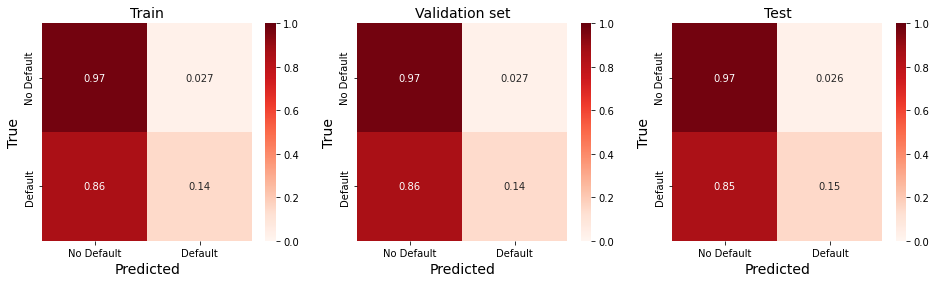

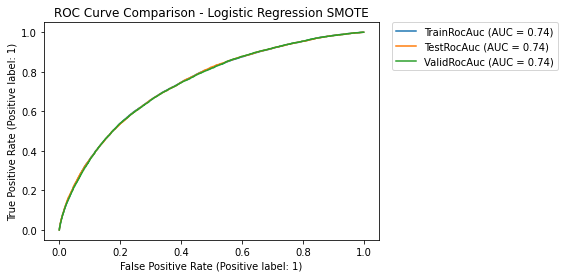

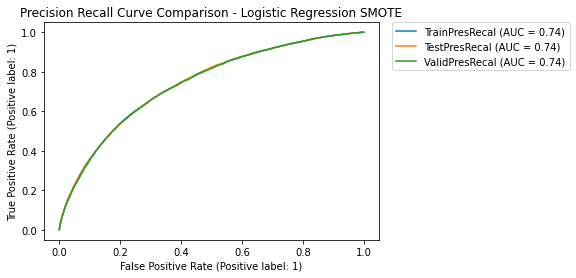

Best Parameters:
	predictor__C: 0.01
	predictor__penalty: l2
	predictor__tol: 0.0001
----  Logistic Regression SMOTE  Finish ---- 



In [ ]:
RunGridResearchSMOTE(classifiers[0],cnfmatrix,fprs,tprs,precisions,recalls)

In [ ]:
Log

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score,Train Log Loss,Valid Log Loss,Test Log Loss,P Score
0,Logistic Regression SMOTE,0.9079,0.9081,0.9094,0.7402,0.7405,0.7405,0.1985,0.1964,0.2049,3.1823,3.174,3.1292,0.0019


### Gradient Boosting

RunGridResearchSMOTE(classifiers[1],cnfmatrix,fprs,tprs,precisions,recalls)

In [ ]:
Log

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score,Train Log Loss,Valid Log Loss,Test Log Loss,P Score
0,Logistic Regression SMOTE,0.9079,0.9081,0.9094,0.7402,0.7405,0.7405,0.1985,0.1964,0.2049,3.1823,3.1740,3.1292,0.0019
1,Gradient Boosting SMOTE,0.9401,0.9353,0.9316,0.8993,0.8733,0.8601,0.5029,0.4509,0.4155,2.0694,2.2354,2.3619,0.0030


#### Results for the SMOTE



In [ ]:
pd.set_option('display.max_colwidth', None)
Log

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score,Train Log Loss,Valid Log Loss,Test Log Loss,P Score
0,Logistic Regression SMOTE,0.9079,0.9081,0.9094,0.7402,0.7405,0.7405,0.1985,0.1964,0.2049,3.1823,3.1740,3.1292,0.0019
1,Gradient Boosting SMOTE,0.9401,0.9353,0.9316,0.8993,0.8733,0.8601,0.5029,0.4509,0.4155,2.0694,2.2354,2.3619,0.0030


# Write-up
In this section, we will summarize the work done for phase 3.

## Project title:
Predicting credit default risk using machine learning

## Team and phase leader plan:
This week, our phase leader is Woojeong Kim. Our phase schedule is below

| Phase |  Phase leader |
|----------|----------|
| Phase 1    | Evie Mahsem    |
| Phase 2    | Wunchana Seubwai    |
| Phase 3    | Woojeong Kim    |
| Phase 4    | Alaina Barca    |

## Credit assignment plan for phase 3:
| Group member |  Tasks completed |
|----------|----------|
| Evie Mahsem    | Did feature engineering, hyperparameter tuning, additional feature selection, ensemble methods.|
| Wunchana Seubwai | Wrote report |
| Woojeong Kim   |  Did feature engineering, hyperparameter tuning, additional feature selection, ensemble methods.|
| Alaina Barca   |  Developed slides and presentation video |

## Abstract
The aim of this final project on the Home Credit Default Risk dataset is to develop a predictive model that accurately predicts whether a client will default on a loan. For phase 3 of the final project, our classification model performance to identify potential loan defaulters among Home Credit's clientele have been improved by implementing several methods, including adding more feature engineering techniques, using more machine learning algorithm (Logistic regression and gradient boosting machines), hyperparameter tuning, handle class imbalance issue using Synthetic Minority Over-sampling TEchnique (SMOTE). Several evaluation metrics, including accuracy score, precision, recall, F-1 score, confusion matrix, and ROC-AUC curve, were used to evaluate model performance. Without SMOTE, Gradient Boosting outperformed Logistic Regression in terms of accuracy, AUC, and F1 score across training, validation, and test sets. With SMOTE, there was an overall improvement in the performance metrics, particularly the F1 score, indicating that SMOTE effectively mitigated class imbalance. Specifically, Gradient Boosting with SMOTE demonstrated a marked increase in the F1 score, rising from approximately 0.27 to 0.50 on the training set, and from 0.23 to 0.45 on the validation set, despite a marginal decrease in accuracy and AUC compared to the model without SMOTE. In the final project phase 4, a neural network, advanced model architectures, and loss functions will be implemented to improve classification performance for Home Credit Default Risk dataset.

## Introduction
A consumer’s ability to access a line of credit is often highly dependent on their credit history, leaving many potentially credit-worthy consumers without traditional loan options simply due to insufficient data. In this project, we will explore data from Home Credit, a lender striving to lend to consumers with insufficient credit histories using alternative lending data, to improve their methods for predicting loan repayment. We will use consumer transaction and payment data to develop pipelines for various machine learning algorithms – including logistic regressions, classification methods, and deep learning models – to predict consumers’ likelihood of default. We will evaluate each method’s predictive power using the ROC curve and produce a report summarizing the methods tested and the strongest performing predictor of consumer default. We will follow the project schedule for intermediate steps, which includes developing EDA and baseline pipeline in week 14, feature engineering and hyperparameter tuning in week 15, and implementing neural networks, advanced models, and finalizing the project in week 16.

For this phase (week 15), several methods, including additional feature engineering techniques, using more machine learning algorithm (Logistic regression and gradient boosting machines), hyperparameter tuning, Synthetic Minority Over-sampling TEchnique (SMOTE), have been implemented.  The result from phase 2 and phase 3 was discussed. We conclude with next steps for phase 4.

## Dataset
The dataset from Home Credit is comprised of seven different sources of data. The first, __application_train/application_test (307k rows, and 48k rows)__ is our main training and testing data. Six other datasets supplement the main train and test data. The dataset __bureau (1.7 Million rows)__ contains client credit history, __bureau_balance (27 Million rows)__ includes monthly credit history, __previous_application (1.6 Million rows)__ contains previous applications, __POS_CASH_BALANCE (10 Million rows)__ provides monthly data on spending, __credit_card_balance__ gives us monthly credit card information, and __installments_payment (13.6 Million rows)__ contains previous loan payments with Home Credit, if any.

## Feature Engineering
In final project phase 3, several feature engineering have been used to improve model performance, including
- Numerical Features Processing (num_pipeline): num_pipeline involves a pipeline that processes numerical features.
- Categorical Features Processing (cat_pipeline): this pipeline is probably responsible for handling categorical variables.
- Feature selection by SelectKBest which selects the top k features based on a scoring function (in this case, mutual_info_classif which measures the dependency between variables).
- SMOTE (Synthetic Minority Over-sampling Technique) is also included in the pipeline, which is a technique to address class imbalance by oversampling the minority class in the dataset.

## Modeling Pipelines
The data analysis pipeline of the final project phase 3 was shown below.

![Phase%203_Analysis%20Work%20Flow.png](attachment:Phase%203_Analysis%20Work%20Flow.png)

## Experimental results

In Phase 3 of the final project, We implemented additional techniques, including feature engineering, hyperparameter tuning, feature selection, ensemble methods, and addressing class imbalance, into our machine learning model to identify potential loan defaulters within the Home Credit Default Risk dataset. The classification performance of each machine learning models were evaluated via accuracy, confusion matrix, precision, recall, F1 score, and AUC-ROC curve.

As shown in Figure 1 and Figure 2, the confusion matrix indicated that Gradient Boosting model outperforms Logistic Regression model in distinguishing between defaulters and non-defaulters on the Home Credit Default Risk dataset across training, validation, and test sets. However, despite hyperparameter tuning and feature selection, there is no marked improvement in the classification performance of either the Gradient Boosting or Logistic Regression models, particularly for the defaulter class.

In comparision with baseline Logistic Regression model, Gradient Boosting models with hyperparameter tuning and feature selection exhibit higher overall accuracy score (Figure 3A) and AUC score (Figure 3B), Precision-Recall curve (Figure 3C), and confusion matrix (Figure 4) than baseline Logistic Regression model as well as Logistic Regression models with hyperparameter tuning and feature selection.

To address the imbalance issue identified in the Home Credit Default Risk dataset during phase 2, Synthetic Minority Over-sampling TEchnique (SMOTE) was used in the present study. As shown in Figure 6, The logistic regression and gradient boosting models, after hyperparameter tuning, feature selection, and SMOTE, both show high accuracy for 'No Default' predictions across training, validation, and test sets. The inclusion of SMOTE has improved the 'Default' prediction capabilities of both models compared to those without SMOTE. The classification performance of six experimental models were shown in Table 1. Models 1 and 2 were Logistic Regression (LR) and Gradient Boosting (GB) with hyperparameter tuning, respectively. Both models exhibited comparable accuracy, with Model 2 showing a marginally higher Test Accuracy (0.9379) and Test AUC (0.8904). Models 3 (LR) and 4 (GB) improved upon Models 1 and 2 by incorporating feature selection alongside hyperparameter tuning, leading to slightly improved Test AUC scores. Models 5 (LR) and 6 (GB), which applied hyperparameter tuning, feature selection, and SMOTE, showed a substantial improvement in F1 scores on the Test set, with Model 6 achieving the highest Test F1 Score (0.4155) and Test AUC (0.8601) among all models.

These information indicated that  among the six models evaluated, Gradient Boosting with hyperparameter tuning, feature selection, and SMOTE achieved the highest classification performance.

![Phase%203_Figure%201_LR%20and%20GB%20models%20with%20hyperparameter%20tuning.png](attachment:Phase%203_Figure%201_LR%20and%20GB%20models%20with%20hyperparameter%20tuning.png)

![Phase%203_Figure%202_models%20with%20hyperparameter%20tuning_selection.png](attachment:Phase%203_Figure%202_models%20with%20hyperparameter%20tuning_selection.png)

![Phase%203_Figure%203_models%20with%20hyperparameter%20tuning_selection.png](attachment:Phase%203_Figure%203_models%20with%20hyperparameter%20tuning_selection.png)

![Phase%203_Figure%204_models%20with%20hyperparameter%20tuning_selection.png](attachment:Phase%203_Figure%204_models%20with%20hyperparameter%20tuning_selection.png)

![Phase%203_Figure%205_models%20with%20hyperparameter,selection,%20smote.png](attachment:Phase%203_Figure%205_models%20with%20hyperparameter,selection,%20smote.png)

![Phase%203_Table%201.png](attachment:Phase%203_Table%201.png)

## Discussion
Gradient Boosting, a machine learning ensemble technique, with SMOTE technique performed better classification performance than Gradient Boosting without SMOTE and logistic regression models (with and without SMOTE technique)  in terms of accuracy, ROC curve, evaluation metrics, and confusion matrix for 'Class 0' and 'Class 1'.

Gradient Boosting combined with SMOTE significantly enhances classification performance on the Home Credit Default Risk dataset by effectively addressing class imbalance, improving the model's sensitivity and specificity, and enabling more robust learning of complex patterns, leading to superior results in accuracy, AUC score, the confusion matrix and F-1 score.

The main problem in final project phase 3 was the large sample size of the Home Credit Default Risk dataset, which led to extensive computational times and required high-performance computing resources. Initially, our team planned to use several machine learning models, including decision trees, random forests, gradient boosting, neural networks, support vector machines (SVMs), and k-nearest neighbors (KNN). However, running all these models exceeded a computational time of 24 hours. Therefore, we ultimately narrowed our focus to two models: logistic regression and gradient boosting. It would be beneficial if the instructor could provide access to cloud computing resources for each group.

## Conclusion
In this final project phase 3, we implemented additional techniques into our machine learning model to identify potential loan defaulters within the Home Credit Default Risk dataset. These techniques included feature engineering, hyperparameter tuning, feature selection, ensemble methods, and addressing class imbalance.

Without SMOTE, Gradient Boosting outperformed Logistic Regression in terms of accuracy, AUC, and F1 score. With SMOTE, there was an overall improvement in the performance metrics, particularly the F1 score, indicating that SMOTE effectively mitigated class imbalance. Specifically, Gradient Boosting with SMOTE demonstrated a marked increase in the F1 score, rising from approximately 0.27 to 0.50 on the training set, and from 0.23 to 0.45 on the validation set, despite a marginal decrease in accuracy and AUC compared to the model without SMOTE.

Compared to the baseline models in phase 2, our classification model with SMOTE technique in phase 3 performed higher accuracy score, AUC score, and also F1-score, especially in Gradient Boosting model. This improvement suggests that Gradient Boosting with the application of SMOTE seems to be the most effective model for Home Credit Default Risk dataset, providing a good balance of accuracy, AUC, and F1 score, which are crucial for evaluating performance in credit risk prediction.    

Next, we plan to apply a Neural Network, Advanced model architectures, and loss functions to further improve model performance.

## References
- https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/
- https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/#:~:text=What%20is%20Gradient%20Boosting%3F,%2C%20typically%20decision%20trees%2C%20sequentially.
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

## Kaggle submission

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202024-04-15%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%209.10.51.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202024-04-15%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%209.10.51.png)

In [2]:
%%shell
jupyter nbconvert --to html /Users/woojeongkin/Desktop/24Spring/P556/Final_Project/Phase_3/Group2_Phase3_Ver9_notebook.ipynb

[NbConvertApp] WARNING | pattern '/Users/woojeongkin/Desktop/24Spring/P556/Final_Project/Phase_3/Group2_Phase3_Ver9_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instea

CalledProcessError: Command 'jupyter nbconvert --to html /Users/woojeongkin/Desktop/24Spring/P556/Final_Project/Phase_3/Group2_Phase3_Ver9_notebook.ipynb
' returned non-zero exit status 255.